# TSNE for Posters and Talk

In [1]:
import os
import sys
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
sys.path.insert(0, '../lib')
from larval_gonad.notebook import Nb
from larval_gonad.plotting import make_figs, TSNEPlot
from larval_gonad.config import memory
from larval_gonad.cell_selection import SOMA, EARLY_GERM, LATE_GERM

# Setup notebook
nbconfig = Nb.setup_notebook(subproject_dir='../output/FlyMeeting_2018_talk', seurat_dir='../output/combined_testis_force')

last updated: 2018-04-03 
Git hash: 6eb6ba5ecfa67f0cc16e9f71644f0e86b7762ef2


In [2]:
clusters = nbconfig.seurat.get_clusters()
tsne = nbconfig.seurat.get_tsne()
norm = nbconfig.seurat.get_normalized_read_counts()

In [3]:
_colors = sns.color_palette('tab20', n_colors=12)
TSNEPlot(data=tsne.join(clusters['res.0.4']), hue='res.0.4', palette=_colors, s=8)

Text(0.5,1,'Distirubtion of UMI Counts')

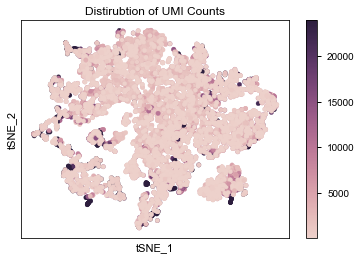

In [4]:
# Is there an affect of UMI on clustering.
# UMI is regressed out so this should not affect overall clustering.
r1 = tsne.index[tsne.index.str.startswith('rep1')].map(lambda x: x.split('_')[1]).tolist()
r2 = tsne.index[tsne.index.str.startswith('rep2')].map(lambda x: x.split('_')[1]).tolist()
r3 = tsne.index[tsne.index.str.startswith('rep3')].map(lambda x: x.split('_')[1]).tolist()

umi1 = pd.read_parquet('../output/testis1/larval_umi.parquet').query(f'cell_id in {r1}')
umi1.index = 'rep1_' + umi1.index
umi2 = pd.read_parquet('../output/testis2/larval_umi.parquet').query(f'cell_id in {r2}')
umi2.index = 'rep2_' + umi2.index
umi3 = pd.read_parquet('../output/testis3/larval_umi.parquet').query(f'cell_id in {r3}')
umi3.index = 'rep3_' + umi3.index

umi = pd.concat([umi1, umi2, umi3])

dat = tsne.join(umi)
TSNEPlot(data=dat, hue='umi_count', cmap=sns.cubehelix_palette(as_cmap=True), 
         vmin=dat.umi_count.min(), vmax=dat.umi_count.quantile(.95))
ax = plt.gca()
ax.set_title('Distirubtion of UMI Counts')

In [5]:
greys = sns.color_palette('Greys')
reds = sns.color_palette('Reds')
reds[0] = greys[0]
blacks = [greys[0], '#000000']

def _plot(gene, ax=None):
    fbgn = nbconfig.symbol2fbgn[gene]
    if ax is None:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(1/3))
        
    try:
        TSNEPlot(data=tsne.join(norm.T), hue=fbgn, palette=reds, ax=ax1)
        TSNEPlot(data=tsne.join(norm.T > 0), hue=fbgn, palette=blacks, ax=ax2)
    except KeyError:
        pass

    ax1.set_aspect('equal')
    ax2.set_aspect('equal')

    fig.suptitle(f'{gene} ({fbgn})', fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, .95])
    
def _plot2(gene, ax=None):
    fbgn = nbconfig.symbol2fbgn[gene]
    if ax is None:
        fig, ax = plt.subplots(1, 1)
        
    try:
        TSNEPlot(data=tsne.join(norm.T), hue=fbgn, palette=reds, ax=ax)
    except KeyError:
        pass

    ax.set_aspect('equal')
    ax.set_title(f'{gene} ({fbgn})')
    plt.tight_layout(rect=[0, 0, 1, .95])

In [6]:
Y = norm.join(nbconfig.fbgn2chrom).query('chrom == "chrY"').T.sum(axis=1)
Y.name = 'Y'

Text(0,0.5,'')

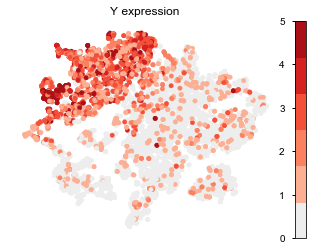

In [7]:
TSNEPlot(data=tsne.join(Y), hue='Y', palette=reds)
ax = plt.gca()
ax.set_title("Y expression")
sns.despine(left=True, bottom=True)
ax.set_xlabel('')
ax.set_ylabel('')

In [8]:
biomarkers = pd.read_csv(Path(nbconfig.seurat_dir, 'biomarkers_0.4.tsv'), sep='\t')
short = biomarkers.query('p_val_adj <= 0.001').sort_values(['cluster', 'avg_logFC'])

In [9]:
SOMA

['bnb',
 'CadN',
 'cora',
 'crp',
 'dsx',
 'Egfr',
 'egr',
 'ems',
 'Fas3',
 'fax',
 'foxo',
 'fru',
 'gbb',
 'ImpL2',
 'Lar',
 'nord',
 'Nrt',
 'oys',
 'Sox100B',
 'spi',
 'spict',
 'tj',
 'tkv',
 'vkg']

In [10]:
short.query(f'gene_symbol in {SOMA}')

primary_FBgn gene_symbol          p_val  avg_logFC  pct.1  pct.2  \
1436  FBgn0014163         fax   5.863143e-80   0.269579  0.953  0.691   
674   FBgn0004108         Nrt   1.190098e-72   0.445903  0.344  0.146   
279   FBgn0001257       ImpL2   1.071527e-88   0.453034  0.382  0.151   
1434  FBgn0014163         fax   1.883505e-95   0.434431  0.922  0.698   
1431  FBgn0014163         fax   1.784005e-70   0.388704  0.958  0.711   
190   FBgn0001090         bnb  1.240954e-291   1.297608  0.709  0.181   
132   FBgn0000464         Lar  4.907244e-157   0.269047  0.512  0.107   
324   FBgn0001994         crp   2.908816e-12   0.281970  0.300  0.187   
131   FBgn0000464         Lar   6.772707e-31   0.336716  0.298  0.128   
1435  FBgn0014163         fax   1.130706e-47   0.419874  0.974  0.720   
5111  FBgn0033483         egr  2.063276e-136   0.429358  0.294  0.037   
601   FBgn0003716         tkv  2.573531e-127   0.491890  0.298  0.043   
2031  FBgn0024234         gbb   6.195178e-76   0.516218  0.409  0.125   
918   FBgn0005672         spi   1.087119e-59   0.544520  0.415  0.157   
280   FBgn0001257       ImpL2   1.348198e-34   0.573987  0.395  0.178   
606   FBgn0003731        Egfr   0.000000e+00   0.999503  0.546  0.032   
137   FBgn0000504         dsx   0.000000e+00   1.138077  0.593  0.077   
173   FBgn0000636        Fas3   0.000000e+00   1.201254  0.540  0.032   
9465  FBgn0050418        nord   0.000000e+00   1.337522  0.655  0.008   
5107  FBgn0033476         oys   2.859864e-13   0.310577  0.338  0.210   
1432  FBgn0014163         fax   7.471422e-34   0.307768  0.991  0.721   
189   FBgn0001090         bnb   1.971427e-13   0.421870  0.370  0.227   
5106  FBgn0033476         oys   1.324760e-94   0.323741  0.683  0.195   
4506  FBgn0032451       spict  1.057720e-117   0.330342  0.699  0.177   
130   FBgn0000464         Lar   2.488278e-09   0.264747  0.263  0.135   
4507  FBgn0032451       spict   2.981573e-18   0.309258  0.415  0.194   
917   FBgn0005672         spi   2.630629e-22   0.334615  0.394  0.167   
1059  FBgn0010434        cora   1.709158e-35   0.370761  0.326  0.087   
160   FBgn0000576         ems   0.000000e+00   0.574160  0.373  0.000   
5110  FBgn0033483         egr  8.093280e-217   0.851386  0.500  0.040   
1437  FBgn0014163         fax   2.765323e-91   1.441325  0.996  0.728   
1640  FBgn0016075         vkg   0.000000e+00   1.462754  0.606  0.003   
919   FBgn0005672         spi   2.520308e-26   0.260863  0.447  0.166   
325   FBgn0001994         crp   1.123481e-24   0.263791  0.470  0.186   
136   FBgn0000504         dsx   3.881385e-49   0.277590  0.429  0.100   
7889  FBgn0038197        foxo   9.647979e-44   0.335745  0.306  0.063   
1576  FBgn0015609        CadN   6.755969e-91   0.483551  0.342  0.042   
1433  FBgn0014163         fax   3.512966e-34   0.490995  0.986  0.729   
781   FBgn0004652         fru   5.388725e-89   0.696882  0.607  0.135   
181   FBgn0000964          tj  2.018787e-193   0.764025  0.598  0.062   
673   FBgn0004108         Nrt   2.883183e-99   1.193142  0.699  0.166   
188   FBgn0001090         bnb  1.082315e-146   1.411991  0.895  0.217   
281   FBgn0001257       ImpL2  1.315285e-161   1.471759  0.840  0.173   

          p_val_adj  cluster  
1436   8.391330e-76        1  
674    1.703269e-68        1  
279    1.533570e-84        1  
1434   2.695672e-91        2  
1431   2.553267e-66        3  
190   1.776054e-287        3  
132   7.023248e-153        4  
324    4.163098e-08        5  
131    9.693099e-27        5  
1435   1.618266e-43        5  
5111  2.952961e-132        5  
601   3.683238e-123        5  
2031   8.866539e-72        5  
918    1.555885e-55        5  
280    1.929541e-30        5  
606    0.000000e+00        5  
137    0.000000e+00        5  
173    0.000000e+00        5  
9465   0.000000e+00        5  
5107   4.093037e-09        6  
1432   1.069310e-29        7  
189    2.821506e-09        7  
5106   1.895996e-90        8  
4506  1.513809e-113        8  
130    3.561223e-

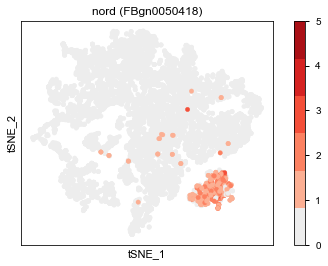

In [11]:
_plot2('nord')

In [12]:
_plot2('Fas3')

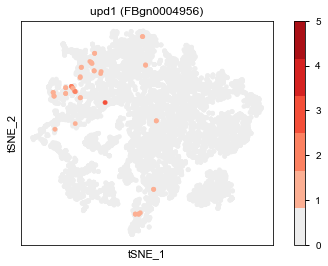

In [13]:
_plot2('upd1')

In [14]:
_plot2('upd2')

In [15]:
_plot2('upd3')

In [25]:
_plot2('dsx')

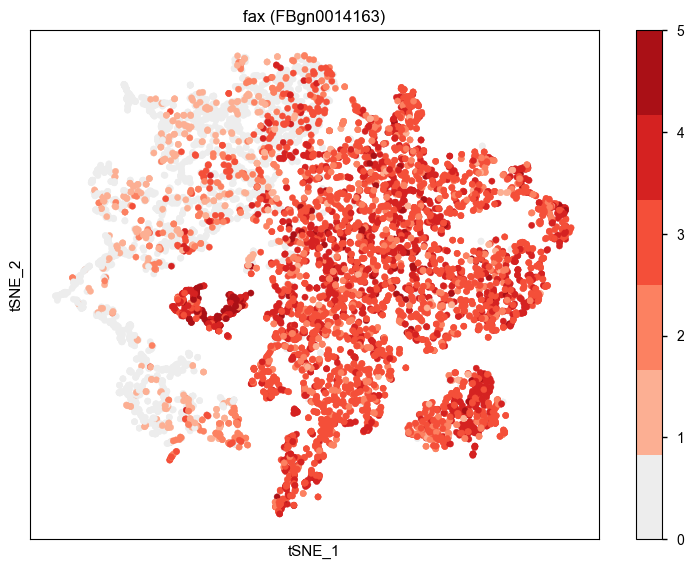

In [26]:
# Early cyst
_plot2('fax')

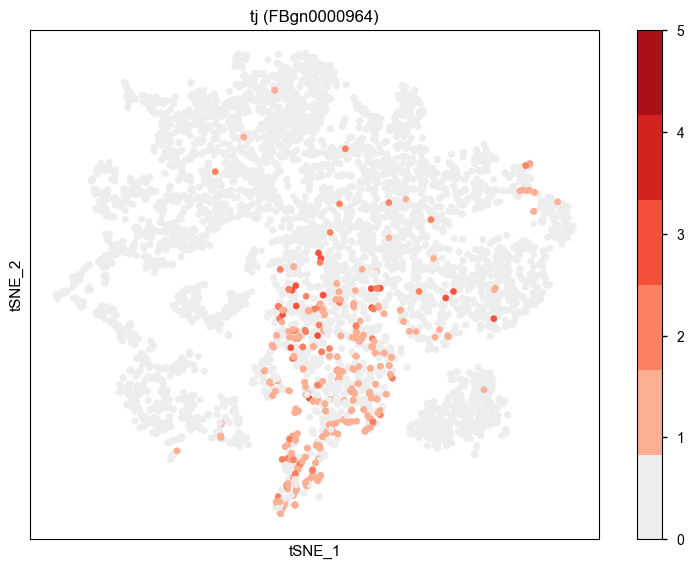

In [27]:
_plot2('tj')

In [28]:
short.query(f'gene_symbol in {EARLY_GERM}')

primary_FBgn gene_symbol          p_val  avg_logFC  pct.1  pct.2  \
5355   FBgn0033921         tej   0.000000e+00   0.253968  0.379  0.024   
988    FBgn0010263        Rbp9   0.000000e+00   0.382946  0.485  0.036   
11711  FBgn0263391         hts  1.100028e-187   0.482709  0.669  0.164   
59     FBgn0000158         bam   0.000000e+00   0.512517  0.512  0.020   
3669   FBgn0031091        Phf7   0.000000e+00   0.613691  0.679  0.083   
12460  FBgn0283442         vas   0.000000e+00   0.871111  0.750  0.032   
757    FBgn0004581        bgcn  1.501691e-189   0.282595  0.464  0.053   
10012  FBgn0052364         tut  1.615969e-207   0.309074  0.571  0.075   
3668   FBgn0031091        Phf7   0.000000e+00   0.795698  0.809  0.097   
11712  FBgn0263391         hts   1.848472e-09   0.293684  0.352  0.199   

           p_val_adj  cluster  
5355    0.000000e+00        4  
988     0.000000e+00        4  
11711  1.574361e-183        4  
59      0.000000e+00        4  
3669    0.000000e+00        4  
12460   0.000000e+00        4  
757    2.149221e-185        8  
10012  2.312775e-203        8  
3668    0.000000e+00        8  
11712   2.645534e-05        9

In [29]:
_plot2('p53')

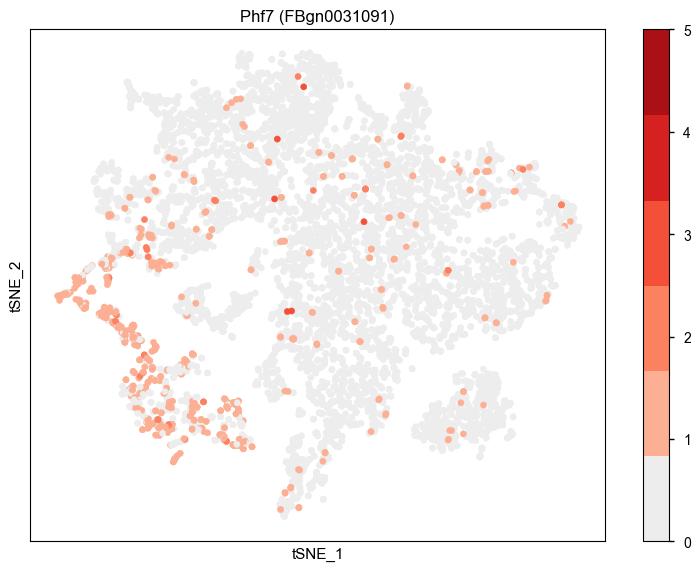

In [30]:
_plot2('Phf7')

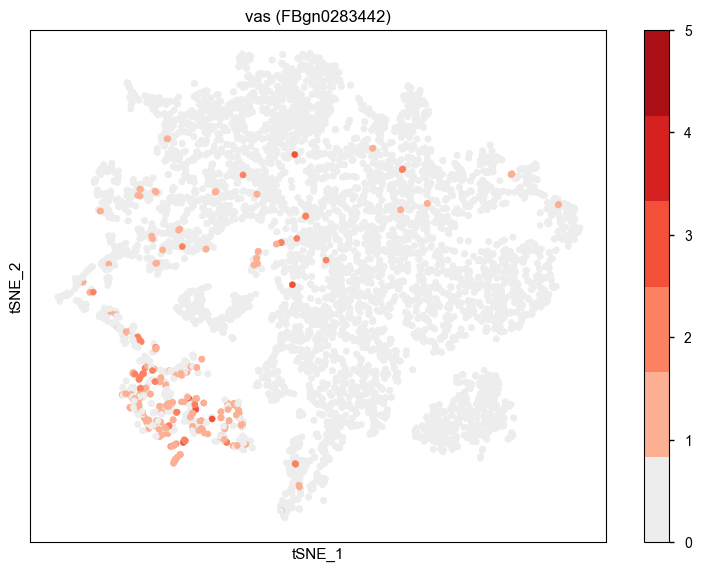

In [31]:
_plot2('vas')

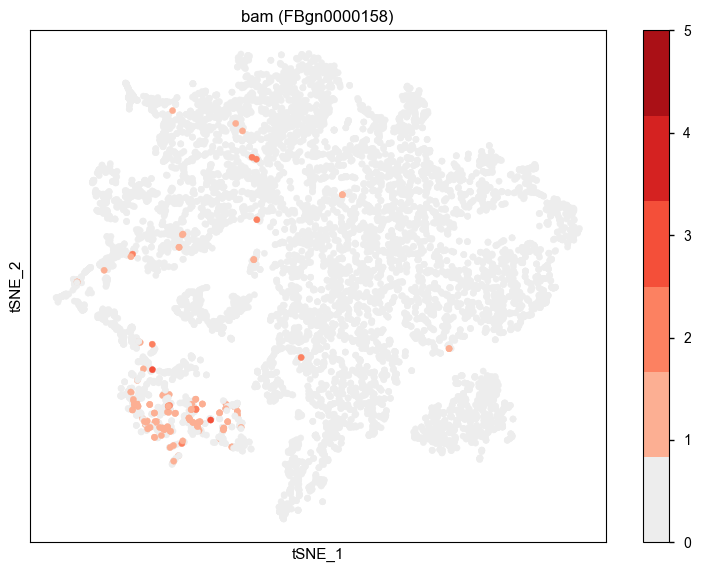

In [32]:
_plot2('bam')

In [33]:
short.query(f'gene_symbol in {LATE_GERM}')

primary_FBgn gene_symbol          p_val  avg_logFC  pct.1  pct.2  \
7816  FBgn0038089       d-cup   1.997137e-56   0.501471  0.251  0.111   
5829  FBgn0034739      CG3927   3.457390e-62   0.584412  0.433  0.259   
1220  FBgn0011596         fzo   1.642025e-92   0.609453  0.313  0.120   
7454  FBgn0037462        sunz  4.900503e-101   0.750205  0.342  0.141   
3835  FBgn0031367       c-cup  1.543748e-134   0.907533  0.454  0.203   
7450  FBgn0037460        sowi  2.278416e-209   1.121305  0.633  0.345   
7919  FBgn0038225        soti   0.000000e+00   1.479888  0.785  0.438   
7455  FBgn0037462        sunz   3.401270e-28   0.265531  0.371  0.169   
7817  FBgn0038089       d-cup   3.767744e-35   0.314672  0.331  0.126   
717   FBgn0004372         aly   9.775019e-35   0.357801  0.284  0.105   
7491  FBgn0037502      wa-cup   4.356090e-65   0.562397  0.349  0.098   
1219  FBgn0011596         fzo   9.766557e-70   0.621610  0.440  0.141   
3834  FBgn0031367       c-cup   2.064136e-67   0.661463  0.573  0.232   
7448  FBgn0037460        sowi   1.125834e-78   0.772068  0.731  0.381   
7920  FBgn0038225        soti  1.784270e-105   0.918793  0.871  0.483   
5828  FBgn0034739      CG3927  1.433646e-144   1.131513  0.747  0.266   
718   FBgn0004372         aly   0.000000e+00   0.700751  0.790  0.083   
5830  FBgn0034739      CG3927  1.059206e-148   0.863734  0.891  0.264   
3557  FBgn0030840       p-cup  3.135366e-120   0.282486  0.873  0.059   
7490  FBgn0037502      wa-cup   5.088580e-78   0.481544  0.945  0.106   
5827  FBgn0034739      CG3927   5.616812e-26   0.550114  0.982  0.288   
1221  FBgn0011596         fzo   7.968619e-55   0.553165  0.982  0.152   
7818  FBgn0038089       d-cup   5.271533e-71   0.577259  1.000  0.132   
3833  FBgn0031367       c-cup   7.644087e-38   0.696010  1.000  0.246   
7456  FBgn0037462        sunz   9.256442e-56   0.766424  1.000  0.174   
7449  FBgn0037460        sowi   3.284700e-33   1.109873  1.000  0.397   
7921  FBgn0038225        soti   4.494065e-33   1.384332  1.000  0.502   

          p_val_adj  cluster  
7816   2.858303e-52        0  
5829   4.948216e-58        0  
1220   2.350067e-88        0  
7454   7.013600e-97        0  
3835  2.209412e-130        0  
7450  3.260869e-205        0  
7919   0.000000e+00        0  
7455   4.867898e-24        6  
7817   5.392395e-31        6  
717    1.399001e-30        6  
7491   6.234436e-61        6  
1219   1.397790e-65        6  
3834   2.954192e-63        6  
7448   1.611293e-74        6  
7920  2.553648e-101        6  
5828  2.051834e-140        6  
718    0.000000e+00        8  
5830  1.515936e-144        8  
3557  4.487336e-116       11  
7490   7.282776e-74       11  
5827   8.038781e-22       11  
1221   1.140469e-50       11  
7818   7.544618e-67       11  
3833   1.094022e-33       11  
7456   1.324782e-51       11  
7449   4.701063e-29       11  
7921   6.431906e-29       11

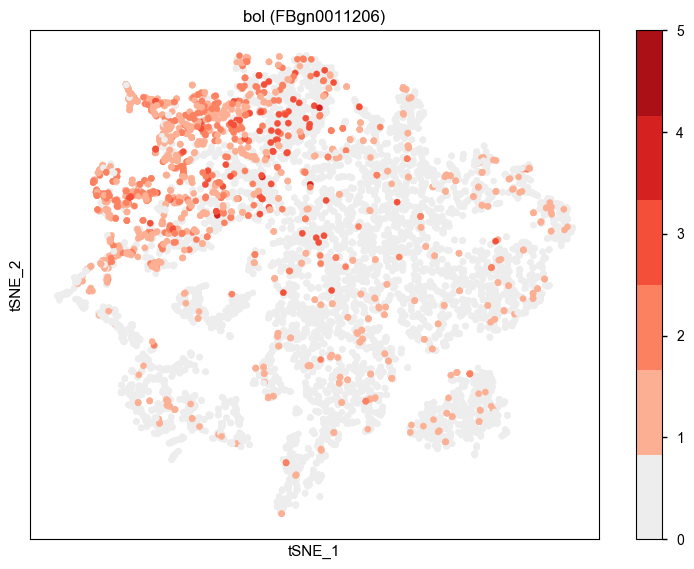

In [34]:
_plot2('bol')

In [35]:
_plot2('aly')

In [36]:
_plot2('c-cup')

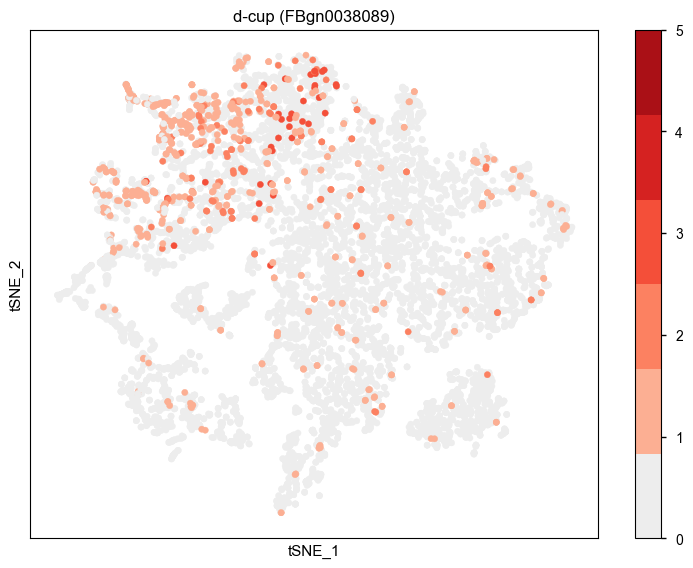

In [37]:
_plot2('d-cup')

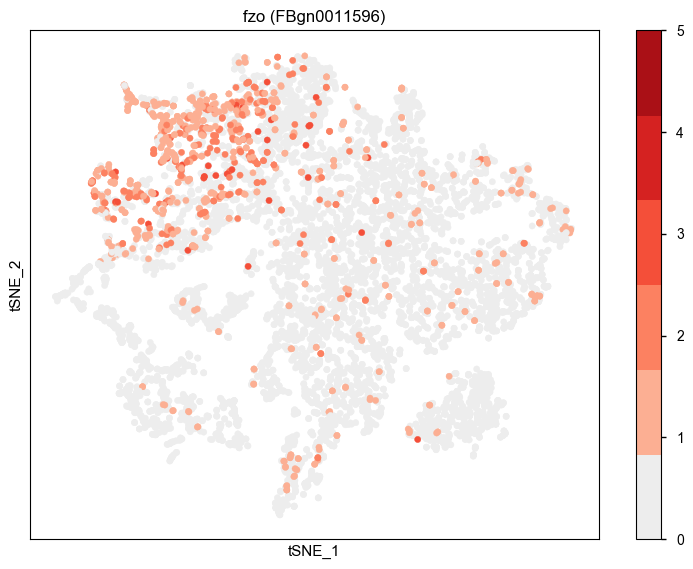

In [38]:
_plot2('fzo')

In [12]:
classes = clusters['res.0.4'].to_frame()
classes.loc[classes['res.0.4'].isin([1, 2, 3, 5, 7, 9, 10]), 'class'] = 'Somatic Cells'
classes.loc[classes['res.0.4'].isin([4, ]), 'class'] = 'Early Germ Cells'
classes.loc[classes['res.0.4'].isin([0, 6, 11]), 'class'] = 'Late Germ Cells'
classes.loc[classes['res.0.4'].isin([8, ]), 'class'] = 'Transitional Germ Cells'
classes['class'] = pd.Categorical(classes['class'], 
                                  categories=['Somatic Cells', 'Early Germ Cells', 'Transitional Germ Cells', 'Late Germ Cells'], 
                                  ordered=True)
classes.drop('res.0.4', axis=1, inplace=True)

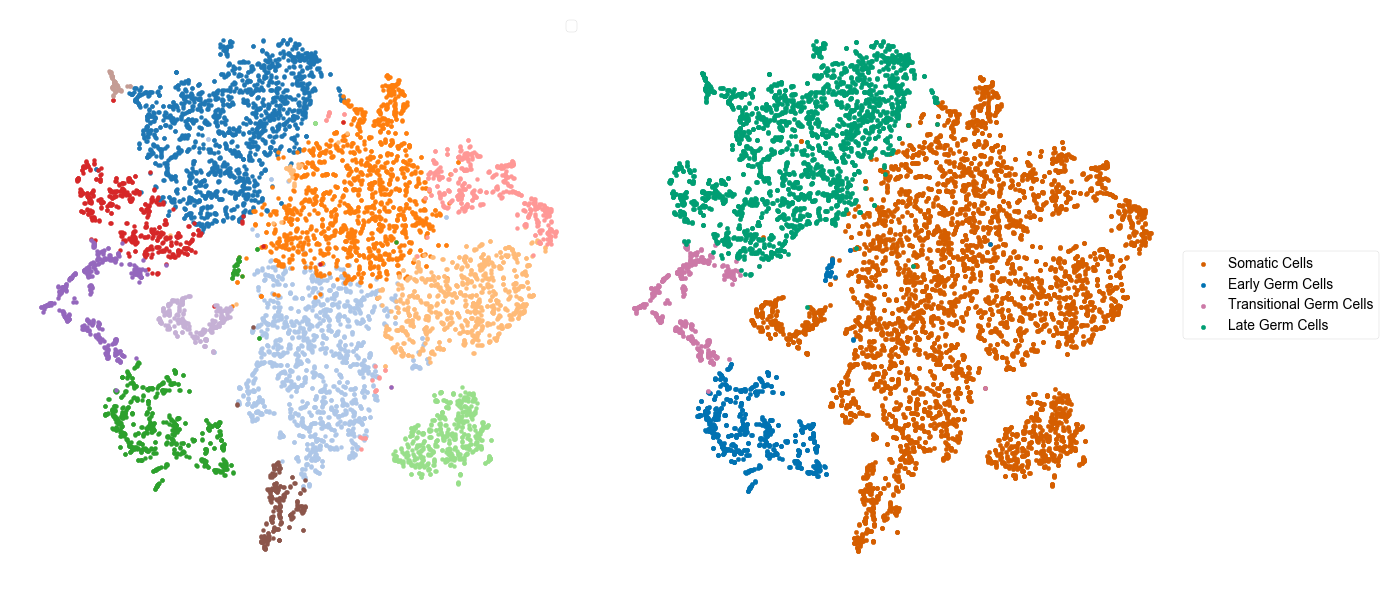

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(1/2))
dat = tsne.join(classes)
dat.sort_values(by='class', inplace=True)
TSNEPlot(data=tsne.join(clusters['res.0.4']), hue='res.0.4', palette=_colors, s=8, ax=ax1) 
TSNEPlot(data=dat, hue='class', palette=sns.color_palette('colorblind'), s=10, ax=ax2)

sns.despine(left=True, bottom=True)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax2.set_xlabel('')
ax2.set_ylabel('')

ax1.legend('')
plt.tight_layout()

In [52]:
from larval_gonad.x_to_a import commonly_expressed, multi_chrom_boxplot, estimate_dcc, CHROMS_CHR, CHROMS

In [54]:
from scipy.stats import mannwhitneyu

In [50]:
expressed = commonly_expressed(norm)

In [301]:
dat = norm.loc[expressed, :].T.join(clusters['res.0.4'])

In [305]:
cnts = dat.groupby('res.0.4').median().T
cnts.columns = cnts.columns.values.tolist()

In [306]:
cnts = cnts.join(nbconfig.fbgn2chrom)

In [307]:
cnts.head()

0         1         2         3         4         5  \
FBgn0031085  1.629581  0.000000  0.000000  0.000000  0.000000  0.000000   
FBgn0024733  1.324660  3.688438  3.220759  3.452557  4.050223  3.787046   
FBgn0040371  2.223977  0.000000  0.000000  0.000000  0.336690  0.000000   
FBgn0025638  0.000000  1.816343  1.679169  1.763274  2.048719  1.590173   
FBgn0002579  1.491449  3.562368  3.353042  3.547959  3.807837  4.107239   

                    6         7         8         9        10        11  chrom  
FBgn0031085  1.609530  0.000000  0.728353  0.000000  0.000000  2.098584   chrX  
FBgn0024733  1.826986  3.289471  3.262875  4.027845  3.905886  1.242596  chr3L  
FBgn0040371  1.888406  0.000000  1.187653  0.000000  0.000000  2.273979   chrX  
FBgn0025638  0.000000  1.719592  1.915245  1.414703  1.989876  0.376334   chrX  
FBgn0002579  2.164851  3.406995  3.059949  3.638381  3.642364  1.538893   chrX

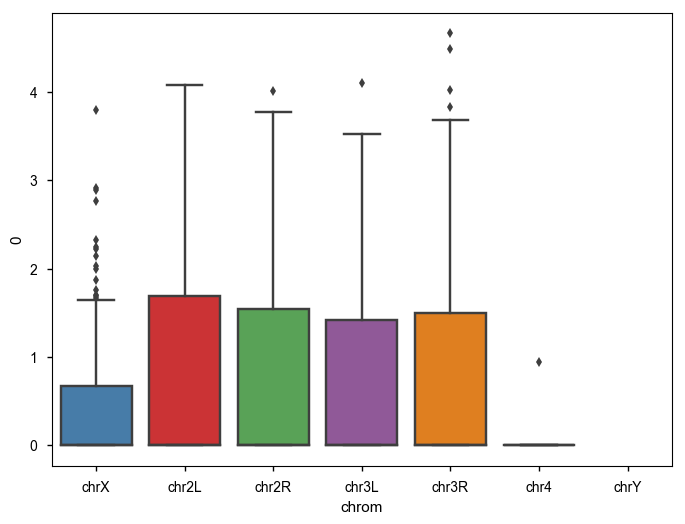

In [339]:
sns.boxplot('chrom', 0, order=CHROMS_CHR, data=cnts)

In [354]:
short.query('cluster == "0"').sort_values('avg_logFC', ascending=False)

primary_FBgn gene_symbol         p_val  avg_logFC  pct.1  pct.2  \
9594   FBgn0051226     CG31226  0.000000e+00   2.046399  1.000  0.853   
685    FBgn0004173     Mst84Db  0.000000e+00   2.028697  1.000  0.827   
290    FBgn0001281        janB  0.000000e+00   1.955537  0.970  0.597   
9199   FBgn0042189     CG17376  0.000000e+00   1.954046  0.996  0.763   
8970   FBgn0040519     CG15219  0.000000e+00   1.946667  0.997  0.765   
1751   FBgn0019828          dj  0.000000e+00   1.920991  0.984  0.648   
10700  FBgn0086915      Mst77F  0.000000e+00   1.900320  0.994  0.790   
690    FBgn0004175     Mst84Dd  0.000000e+00   1.868026  0.931  0.524   
9771   FBgn0051740     CG31740  0.000000e+00   1.855845  0.979  0.639   
9033   FBgn0040747     CG12853  0.000000e+00   1.854734  0.986  0.692   
1318   FBgn0013301       ProtB  0.000000e+00   1.852819  0.949  0.528   
688    FBgn0004174     Mst84Dc  0.000000e+00   1.848541  0.979  0.635   
682    FBgn0004172     Mst84Da  0.000000e+00   1.835253  0.993  0.691   
12398  FBgn0267726     CG46059  0.000000e+00   1.823630  0.988  0.724   
2674   FBgn0028567     robl62A  0.000000e+00   1.802783  0.945  0.573   
9336   FBgn0050039     CG30039  0.000000e+00   1.784879  0.911  0.501   
3785   FBgn0031295      CG4375  0.000000e+00   1.782497  0.946  0.568   
9327   FBgn0047351     CG31468  0.000000e+00   1.752851  0.985  0.737   
8333   FBgn0038978       tHMG1  0.000000e+00   1.748653  0.942  0.569   
9474   FBgn0050430     CG30430  0.000000e+00   1.739591  0.990  0.778   
9790   FBgn0051788     CG31788  0.000000e+00   1.734214  0.978  0.694   
10475  FBgn0085197     CG34168  0.000000e+00   1.733326  0.995  0.777   
4146   FBgn0031859     CG17377  0.000000e+00   1.725139  0.920  0.532   
12315  FBgn0267046     CG45490  0.000000e+00   1.715412  0.683  0.220   
9888   FBgn0051988     CG31988  0.000000e+00   1.712984  0.949  0.567   
4077   FBgn0031751      CG9016  0.000000e+00   1.707203  0.928  0.574   
1315   FBgn0013300       ProtA  0.000000e+00   1.659171  0.931  0.551   
10920  FBgn0260428     CG42523  0.000000e+00   1.658654  0.906  0.567   
4598   FBgn0032588      CG5968  0.000000e+00   1.653383  0.815  0.377   
8392   FBgn0039104     CG10252  0.000000e+00   1.651830  0.929  0.624   
...            ...         ...           ...        ...    ...    ...   
8135   FBgn0038612        cona  3.500737e-14   0.389628  0.285  0.216   
7408   FBgn0037376        Hat1  2.815119e-13   0.389020  0.310  0.263   
5036   FBgn0033350      CG8237  1.380309e-10   0.388390  0.353  0.323   
7306   FBgn0037239     Sfxn1-3  1.989990e-25   0.387492  0.262  0.167   
4972   FBgn0033258      CG8712  2.914402e-20   0.385681  0.273  0.195   
6207   FBgn0035268      CG8001  1.681742e-22   0.383220  0.254  0.169   
5410   FBgn0034033      CG8204  1.083672e-10   0.382391  0.297  0.259   
10447  FBgn0083953     CG34117  3.730335e-08   0.380179  0.451  0.459   
5428   FBgn0034066      CG8397  3.279303e-20   0.379010  0.544  0.530   
12268  FBgn0266709     Zmynd10  6.528864e-31   0.378531  0.306  0.193   
12422  FBgn0267849        Syx7  8.645459e-10   0.376358  0.298  0.263   
7881   FBgn0038195      CG3061  7.806631e-10   0.374264  0.344  0.319   
5911   FBgn0034839     CG13540  2.383301e-28   0.367630  0.498  0.370   
1660   FBgn0016693       Past1  8.566990e-11   0.363352  0.428  0.425   
12457  FBgn0283438     CG46280  1.962996e-08   0.355343  0.349  0.342   
9592   FBgn0051224     CG31224  5.722258e-10   0.351064  0.256  0.213   
9056   FBgn0040784        karr  5.145725e-10   0.350613  0.315  0.253   
5416   FBgn0034051         Mlf  3.623228e-09   0.346814  0.340  0.308   
3987   FBgn0031613         HP6  1.587248e-24   0.345697  0.494  0.377   
5446   FBgn0034091         mrj  1.115967e-10   0.344370  0.300  0.263   
4927   FBgn0033184      mEFTu2  1.554190e-09   0.343410  0.285  0.250   
1504   FBgn0015222     Fer1HCH  1.441888e-15   0.337681  0.634  0.690   
1062   FBgn0010435         emp  1.966778e-13   0.336632  0.310  

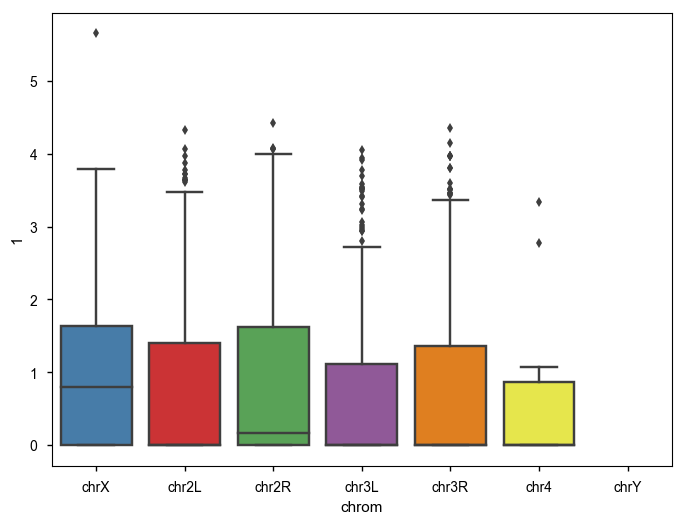

In [340]:
sns.boxplot('chrom', 1, order=CHROMS_CHR, data=cnts)

In [355]:
short.query('cluster == "1"').sort_values('avg_logFC', ascending=False)

primary_FBgn  gene_symbol          p_val  avg_logFC  pct.1  pct.2  \
9742   FBgn0051676      CG31676   0.000000e+00   1.951347  0.946  0.364   
436    FBgn0002868         MtnA   0.000000e+00   1.354384  0.996  0.658   
191    FBgn0001091       Gapdh1   0.000000e+00   1.318029  0.934  0.563   
1943   FBgn0022774          Oat   0.000000e+00   1.221321  0.836  0.361   
11907  FBgn0264478      CG43886   0.000000e+00   1.202463  0.605  0.099   
7619   FBgn0037723         SpdS   0.000000e+00   1.191166  0.685  0.217   
6534   FBgn0035868       CG7194   0.000000e+00   1.155424  0.723  0.238   
530    FBgn0003360         sesB   0.000000e+00   1.136823  0.976  0.707   
11003  FBgn0260768      CG42566   0.000000e+00   1.078060  0.626  0.146   
7550   FBgn0037607       CG8036  1.022286e-283   1.033763  0.830  0.508   
199    FBgn0001098          Gdh  1.484195e-284   1.020491  0.767  0.358   
6970   FBgn0036638      CG13033  1.971621e-212   1.014462  0.373  0.076   
10808  FBgn0259171         Pde9  2.494903e-285   1.014459  0.631  0.204   
1474   FBgn0014869      Pglym78  1.490039e-298   0.975021  0.831  0.419   
11553  FBgn0262782         Mdh1   0.000000e+00   0.946518  0.894  0.593   
6632   FBgn0036030       CG6767  2.821590e-287   0.941286  0.859  0.487   
3521   FBgn0030733      UQCR-14   0.000000e+00   0.933268  0.956  0.737   
8430   FBgn0039154        Npc2f   0.000000e+00   0.927344  0.525  0.081   
8765   FBgn0039830      ATPsynC   0.000000e+00   0.918773  0.985  0.895   
11459  FBgn0262559         Mdh2  1.022888e-273   0.913714  0.820  0.419   
12097  FBgn0265413      CG44325  8.980882e-224   0.897725  0.847  0.445   
4774   FBgn0032889       CG9331   0.000000e+00   0.878169  0.603  0.157   
1773   FBgn0020235  ATPsyngamma   0.000000e+00   0.875621  0.913  0.681   
5946   FBgn0034877         levy   0.000000e+00   0.861839  0.984  0.850   
2596   FBgn0028342  ATPsyndelta   0.000000e+00   0.859533  0.941  0.705   
2423   FBgn0027291    l(1)G0156  1.260823e-220   0.855974  0.734  0.393   
9060   FBgn0040793       CG7630   0.000000e+00   0.847782  0.986  0.792   
4734   FBgn0032833         COX4   0.000000e+00   0.843232  0.968  0.764   
8838   FBgn0039993      CG17691  5.549373e-212   0.842341  0.707  0.371   
4123   FBgn0031830        COX5B   0.000000e+00   0.840253  0.968  0.792   
...            ...          ...            ...        ...    ...    ...   
10681  FBgn0086758       chinmo   5.966938e-26   0.261895  0.443  0.308   
4938   FBgn0033208       mRpL52   3.661241e-30   0.261605  0.672  0.523   
1524   FBgn0015288        RpL22   1.021790e-46   0.261475  0.478  0.283   
11211  FBgn0261608       RpL37A   3.241211e-64   0.261444  0.971  0.840   
8954   FBgn0040397       CG3655   1.847949e-30   0.260791  0.309  0.174   
8834   FBgn0039970      CG17508   4.577563e-26   0.260642  0.388  0.262   
3619   FBgn0030974       CG7358   3.098260e-41   0.260293  0.282  0.139   
1142   FBgn0011204          cue   1.702192e-31   0.260234  0.296  0.171   
7327   FBgn0037270       eIF3f1   7.146480e-32   0.260135  0.623  0.478   
9114   FBgn0040985       CG6115   1.685436e-45   0.259504  0.811  0.671   
2108   FBgn0025336       CG4882   4.794834e-26   0.259462  0.382  0.258   
1402   FBgn0014020         Rho1   1.618565e-40   0.259012  0.787  0.594   
2662   FBgn0028546          ics   8.530988e-33   0.258368  0.390  0.245   
8354   FBgn0039026       CG7029   9.417578e-44   0.257490  0.291  0.142   
10147  FBgn0052803      CG32803   5.685506e-27   0.257352  0.523  0.401   
1407   FBgn0014023       mRpL47   4.579528e-28   0.256493  0.464  0.326   
7749   FBgn0037955       CG6950   8.446778e-28   0.255192  0.403  0.275   
5083   FBgn0033451       CG1665   7.835564e-42   0.255149  0.263  0.126   
770    FBgn0004636         Rap1   1.328210e-35   0.254849  0.687  0.508   
2734   FBgn0028693        Rpn12   3.785613e-32   0.254664  0.512  0.355   
7188   FBgn0036998       CG5969   7.823859e-23   0.253342  0.557  0.450   
1585   FBgn0015756         RpL9

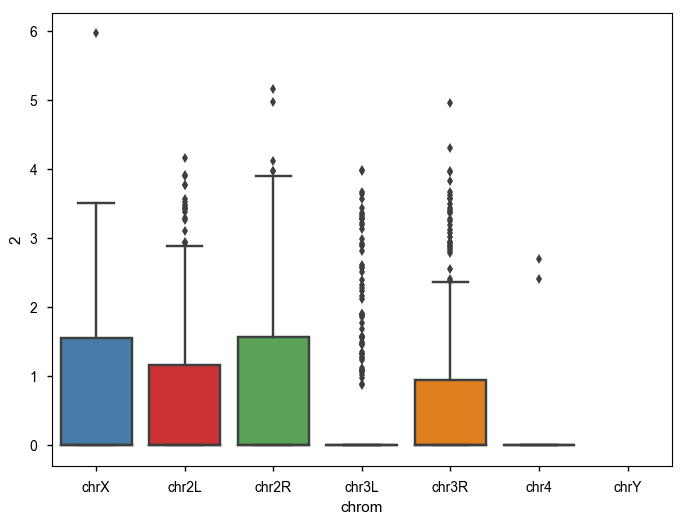

In [341]:
sns.boxplot('chrom', 2, order=CHROMS_CHR, data=cnts)

In [356]:
short.query('cluster == "2"').sort_values('avg_logFC', ascending=False)

primary_FBgn  gene_symbol          p_val  avg_logFC  pct.1  pct.2  \
8673   FBgn0039678       Obp99a   0.000000e+00   1.860437  0.960  0.730   
11463  FBgn0262563      CG43103   0.000000e+00   1.713886  0.861  0.363   
1241   FBgn0011695       EbpIII  2.927781e-274   1.406493  0.545  0.154   
10594  FBgn0085489      CG34460  1.581807e-236   1.381642  0.365  0.066   
7892   FBgn0038198        Npc2b   0.000000e+00   1.324210  0.758  0.293   
11730  FBgn0263415      CR43461   0.000000e+00   1.283852  0.906  0.603   
3215   FBgn0030160       CG9691  3.017058e-296   1.226396  0.766  0.349   
3213   FBgn0030159       CG9689  6.539147e-281   1.167272  0.719  0.290   
4983   FBgn0033268       Obp44a   0.000000e+00   1.131449  0.990  0.842   
9627   FBgn0051313      CG31313  3.644522e-282   1.129819  0.564  0.155   
2041   FBgn0024294      Spn43Aa  5.070580e-240   1.116920  0.538  0.157   
7727   FBgn0037913         fabp   0.000000e+00   1.098403  0.958  0.785   
10391  FBgn0063497        GstE3  4.364377e-306   1.092086  0.882  0.481   
12288  FBgn0266811      CR45273  2.083058e-267   1.065496  0.312  0.034   
8130   FBgn0038610       CG7675  8.741113e-261   1.064617  0.637  0.218   
2500   FBgn0027556       CG4928  1.171693e-192   1.051982  0.639  0.285   
624    FBgn0003886  alphaTub85E  1.142595e-175   1.050595  0.462  0.156   
971    FBgn0010226        GstS1   0.000000e+00   1.034788  0.988  0.897   
9236   FBgn0043841        vir-1  9.692277e-232   1.017348  0.833  0.479   
10607  FBgn0086254       CG6084  2.694289e-176   0.998482  0.746  0.530   
5509   FBgn0034199         Gbp1  7.151647e-179   0.995023  0.540  0.219   
10573  FBgn0085446      CG34417  1.980580e-168   0.984149  0.640  0.310   
10493  FBgn0085218      CG34189  2.331750e-207   0.956357  0.278  0.038   
768    FBgn0004629          Cys  1.153525e-159   0.940580  0.548  0.243   
283    FBgn0001258        ImpL3  1.352113e-147   0.929047  0.593  0.296   
11895  FBgn0264462      CR43870  1.768382e-177   0.916507  0.597  0.266   
1301   FBgn0012036         Aldh  2.049167e-169   0.915054  0.787  0.665   
8275   FBgn0038878       CG3301  1.365831e-211   0.905076  0.467  0.129   
7226   FBgn0037063       CG9391  7.364132e-149   0.872116  0.606  0.314   
4487   FBgn0032429       CG5446  9.296332e-199   0.862740  0.834  0.698   
...            ...          ...            ...        ...    ...    ...   
1560   FBgn0015521        RpS21   3.341346e-74   0.303089  0.966  0.917   
2594   FBgn0028342  ATPsyndelta   4.055831e-45   0.302361  0.815  0.732   
11458  FBgn0262559         Mdh2   4.056667e-28   0.302155  0.602  0.465   
1440   FBgn0014184          Oda   3.320087e-30   0.301244  0.748  0.680   
3569   FBgn0030870       CG6398   3.211675e-11   0.299415  0.266  0.199   
8789   FBgn0039858         CycG   2.392136e-12   0.298492  0.582  0.590   
9102   FBgn0040931       CG9034   5.724605e-30   0.298022  0.738  0.719   
10640  FBgn0086472        RpS25   5.041717e-63   0.296467  0.984  0.934   
10404  FBgn0066084        RpL41   2.923577e-51   0.292342  0.994  0.979   
2018   FBgn0023537      CG17896   1.163105e-08   0.290545  0.287  0.239   
2633   FBgn0028479     Mtpalpha   2.253755e-09   0.289943  0.408  0.368   
6404   FBgn0035600       Cyt-c1   1.390640e-17   0.287593  0.548  0.461   
10340  FBgn0058045      CG40045   1.514188e-14   0.287214  0.633  0.620   
8833   FBgn0039969         Fis1   4.252820e-19   0.286232  0.675  0.699   
11750  FBgn0263598      Vha68-2   1.414313e-08   0.279213  0.343  0.294   
6983   FBgn0036663       CG9674   2.324385e-12   0.277835  0.444  0.372   
5218   FBgn0033691       CG8860   1.948626e-26   0.274853  0.747  0.765   
593    FBgn0003660          Syb   6.760797e-12   0.274843  0.685  0.735   
7622   FBgn0037728      CG16817   1.457872e-44   0.272656  0.859  0.878   
8842   FBgn0040007        RpL38   1.230555e-49   0.271520  0.975  0.918   
1384   FBgn0013981        His4r   3.959828e-45   0.270813  0.892  0.854   
4312   FBgn0032160       CG4598

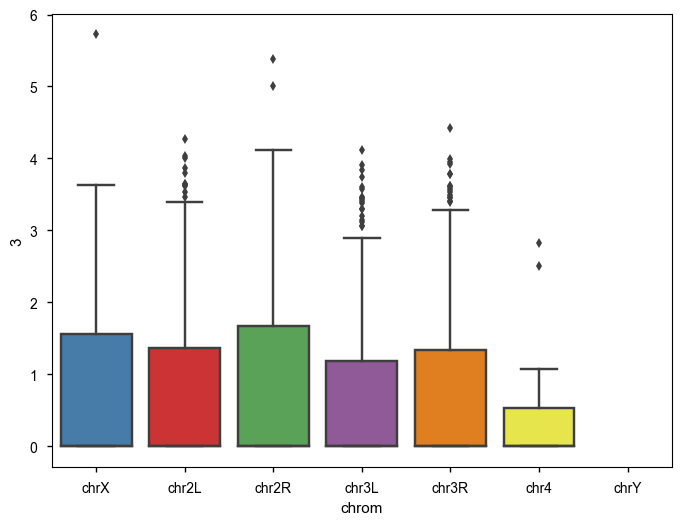

In [342]:
sns.boxplot('chrom', 3, order=CHROMS_CHR, data=cnts)

In [357]:
short.query('cluster == "3"').sort_values('avg_logFC', ascending=False)

primary_FBgn  gene_symbol          p_val  avg_logFC  pct.1  pct.2  \
5178   FBgn0033631         Sod3   0.000000e+00   1.930876  0.938  0.266   
190    FBgn0001090          bnb  1.240954e-291   1.297608  0.709  0.181   
4984   FBgn0033268       Obp44a  1.067335e-295   1.285557  0.999  0.853   
10861  FBgn0259740      CG42394  1.436476e-276   1.225347  0.958  0.529   
282    FBgn0001258        ImpL3  5.269808e-189   1.218592  0.726  0.304   
10390  FBgn0063497        GstE3  1.298721e-242   1.164095  0.933  0.506   
6584   FBgn0035969       CG4476  4.124879e-257   1.147290  0.627  0.154   
5041   FBgn0033355      CG13748  4.932614e-303   1.138621  0.504  0.074   
3410   FBgn0030521        CtsB1  5.456857e-190   0.999935  0.924  0.618   
4213   FBgn0031971        Sirup  4.417197e-166   0.994890  0.867  0.598   
4185   FBgn0031914       CG5973  5.797959e-197   0.994253  0.714  0.254   
11731  FBgn0263415      CR43461  5.864626e-204   0.993723  0.945  0.622   
3156   FBgn0030040      CG15347  2.467501e-184   0.941143  0.675  0.217   
2177   FBgn0025697  santa-maria  8.559254e-196   0.937434  0.468  0.103   
8131   FBgn0038610       CG7675  6.803951e-190   0.929339  0.709  0.242   
5846   FBgn0034761       CG4250  1.082863e-191   0.917686  0.895  0.491   
972    FBgn0010226        GstS1  2.170916e-225   0.915944  0.998  0.903   
8674   FBgn0039678       Obp99a  1.270119e-160   0.905139  0.964  0.748   
9234   FBgn0043841        vir-1  8.148674e-130   0.894718  0.873  0.502   
3354   FBgn0030409      CG15728  2.035917e-167   0.885745  0.862  0.478   
8963   FBgn0040496      CG17104  7.351704e-140   0.878640  0.686  0.303   
2542   FBgn0027657        glob1  2.539392e-171   0.851289  0.789  0.338   
5127   FBgn0033518    Prx2540-2  3.520347e-138   0.793490  0.594  0.222   
5242   FBgn0033717       CG8839  3.929700e-108   0.785819  0.622  0.298   
1244   FBgn0011705         rost  1.056699e-127   0.783232  0.425  0.122   
10385  FBgn0063494        GstE6  1.710453e-136   0.769733  0.788  0.390   
6293   FBgn0035432       ZnT63C   6.623367e-87   0.761569  0.625  0.350   
6644   FBgn0036043       CG8177  4.578017e-129   0.761294  0.721  0.325   
5132   FBgn0033521      CG12896  9.692690e-126   0.739739  0.525  0.184   
7073   FBgn0036773      CG13698  1.316533e-109   0.737316  0.583  0.246   
...            ...          ...            ...        ...    ...    ...   
4303   FBgn0032140      CG13117   6.081415e-25   0.270754  0.440  0.274   
8863   FBgn0040070        Trx-2   8.753988e-12   0.270673  0.607  0.532   
8788   FBgn0039858         CycG   3.464918e-19   0.270136  0.664  0.580   
5227   FBgn0033699        RpS11   9.800045e-37   0.269001  0.989  0.918   
8217   FBgn0038742        Arc42   3.715819e-11   0.268455  0.394  0.313   
4557   FBgn0032518        RpL24   5.823865e-36   0.268443  0.985  0.892   
10122  FBgn0052672        Atg8a   2.627555e-15   0.267765  0.606  0.540   
1043   FBgn0010411        RpS18   4.639121e-38   0.266660  0.966  0.878   
11909  FBgn0264490       Eip93F   4.190234e-39   0.266511  0.261  0.105   
1897   FBgn0021967      ND-PDSW   5.273300e-34   0.266153  0.876  0.799   
366    FBgn0002590        RpS5a   2.844985e-32   0.265781  0.958  0.828   
8901   FBgn0040309      Jafrac1   7.833921e-21   0.265634  0.701  0.536   
1965   FBgn0023129          aay   1.846972e-16   0.265369  0.343  0.230   
738    FBgn0004403       RpS14a   1.936631e-32   0.264935  0.941  0.840   
3863   FBgn0031413       CG9967   5.013426e-24   0.263951  0.280  0.149   
1760   FBgn0019936        RpS20   3.392501e-40   0.263368  0.983  0.935   
5484   FBgn0034138        RpS15   2.823236e-36   0.263269  0.993  0.914   
8718   FBgn0039757         RpS7   2.183970e-34   0.260917  0.978  0.891   
316    FBgn0001977      CIAPIN1   1.026121e-11   0.259975  0.583  0.531   
9504   FBgn0050499      CG30499   1.066953e-14   0.258860  0.599  0.531   
4831   FBgn0032987        RpL21   8.093113e-31   0.258722  0.981  0.870   
10346  FBgn0058263        MFS17

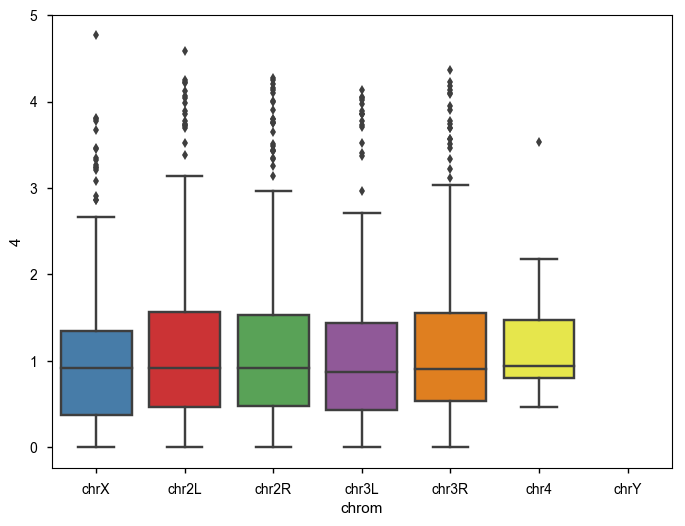

In [343]:
sns.boxplot('chrom', 4, order=CHROMS_CHR, data=cnts)

In [358]:
short.query('cluster == "4"').sort_values('avg_logFC', ascending=False)

primary_FBgn     gene_symbol          p_val  avg_logFC  pct.1  pct.2  \
7950   FBgn0038277           RpS5b   0.000000e+00   2.457861  0.979  0.377   
1307   FBgn0013269       FK506-bp1   0.000000e+00   2.115255  0.979  0.386   
5907   FBgn0034837      RpL22-like   0.000000e+00   2.112930  0.955  0.181   
1551   FBgn0015393            hoip   0.000000e+00   2.051268  0.968  0.329   
3787   FBgn0031296          CG4415   0.000000e+00   1.990185  0.970  0.136   
9687   FBgn0051477  ATPsynepsilonL   0.000000e+00   1.982147  0.978  0.271   
10767  FBgn0250837         dUTPase   0.000000e+00   1.847763  0.957  0.191   
11357  FBgn0262104         CG42857   0.000000e+00   1.788935  0.958  0.152   
11490  FBgn0262606         CR43132   0.000000e+00   1.733127  0.957  0.179   
8412   FBgn0039129          RpS19b   0.000000e+00   1.713937  0.981  0.330   
2258   FBgn0026196            nop5   0.000000e+00   1.691311  0.949  0.169   
5883   FBgn0034822          RpL37b   0.000000e+00   1.677030  0.953  0.291   
4276   FBgn0032089          Rcd-1r   0.000000e+00   1.675847  0.915  0.075   
2889   FBgn0029148            NHP2   0.000000e+00   1.662631  0.921  0.312   
708    FBgn0004362            HmgD   0.000000e+00   1.654330  0.947  0.337   
11987  FBgn0264922            smt3   0.000000e+00   1.553554  0.992  0.832   
2243   FBgn0026175            SkpC   0.000000e+00   1.544104  0.960  0.207   
3663   FBgn0031074            SkpE   0.000000e+00   1.542397  0.915  0.086   
10174  FBgn0052971         CG32971   0.000000e+00   1.537794  0.953  0.270   
8325   FBgn0038964           Nop56   0.000000e+00   1.503563  0.937  0.255   
1945   FBgn0022893            Df31   0.000000e+00   1.499837  0.892  0.193   
8910   FBgn0040338       TfIIA-S-2   0.000000e+00   1.489996  0.934  0.183   
2456   FBgn0027494          RpS10a   0.000000e+00   1.488756  0.973  0.291   
5866   FBgn0034802            CNBP   0.000000e+00   1.482298  0.994  0.713   
1516   FBgn0015268            Nap1   0.000000e+00   1.475536  0.974  0.516   
2105   FBgn0025111            Ant2  2.433955e-270   1.466402  0.955  0.453   
8705   FBgn0039735             Nph   0.000000e+00   1.445270  0.982  0.623   
1529   FBgn0015299        Ssb-c31a   0.000000e+00   1.434353  0.965  0.444   
11352  FBgn0262101         CG42854   0.000000e+00   1.432943  0.886  0.081   
12169  FBgn0266000         CG44774  9.848864e-270   1.421613  0.990  0.503   
...            ...             ...            ...        ...    ...    ...   
5685   FBgn0034504          CG8929  4.937784e-116   0.255829  0.624  0.188   
9135   FBgn0041164            armi  8.456940e-147   0.255629  0.424  0.082   
2389   FBgn0027079           ValRS  1.094576e-247   0.255438  0.400  0.042   
7807   FBgn0038055            trus  6.415191e-227   0.255407  0.422  0.052   
6183   FBgn0035237         CG13917   5.483448e-83   0.255380  0.758  0.291   
8769   FBgn0039835          mRpL32   3.507186e-81   0.255240  0.787  0.322   
3079   FBgn0029887          CG3198  7.217708e-148   0.255160  0.567  0.135   
7387   FBgn0037356         CG12170  3.391942e-120   0.255146  0.557  0.154   
11849  FBgn0264294          Cyt-b5   5.670155e-51   0.255041  0.900  0.544   
6048   FBgn0035025             uri  2.679880e-226   0.255022  0.409  0.049   
7725   FBgn0037911         CG10898  1.778854e-202   0.255013  0.515  0.088   
2218   FBgn0026015        Top3beta  3.093214e-148   0.254853  0.446  0.089   
964    FBgn0010220          Dbp45A  2.125210e-207   0.254680  0.457  0.068   
12596  FBgn0285952            eEF5   2.242113e-39   0.254464  0.982  0.903   
10320  FBgn0053969         CG33969  8.996477e-133   0.254307  0.490  0.114   
8460   FBgn0039210         CG13625  2.233920e-209   0.254021  0.379  0.045   
5355   FBgn0033921             tej   0.000000e+00   0.253968  0.379  0.024   
7660   FBgn0037810             sle  1.993574e-130   0.253554  0.692  0.204   
11484  FBgn0262598            mtsh  1.828806e-164   0.253465  0.387  0.061   
3955   FBgn0031544         C

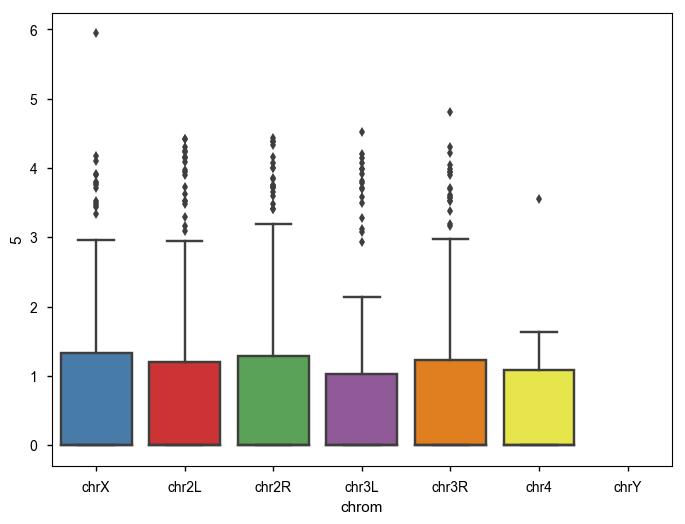

In [344]:
sns.boxplot('chrom', 5, order=CHROMS_CHR, data=cnts)

In [359]:
short.query('cluster == "5"').sort_values('avg_logFC', ascending=False)

primary_FBgn       gene_symbol          p_val  avg_logFC  pct.1  pct.2  \
406    FBgn0002732  E(spl)malpha-BFM   0.000000e+00   2.755304  0.942  0.081   
370    FBgn0002592      E(spl)m2-BFM   0.000000e+00   2.701996  0.956  0.066   
10631  FBgn0086408               stl   0.000000e+00   2.625205  0.935  0.016   
10836  FBgn0259244           CG42342   0.000000e+00   2.458162  0.968  0.220   
12287  FBgn0266801           CG45263   0.000000e+00   2.453153  0.927  0.166   
12109  FBgn0265487               mbl   0.000000e+00   2.244040  0.940  0.254   
794    FBgn0004795              retn   0.000000e+00   2.146267  0.768  0.012   
2      FBgn0000015             Abd-B   0.000000e+00   2.062165  0.853  0.008   
1564   FBgn0015541               sda   0.000000e+00   2.014288  0.913  0.159   
11475  FBgn0262579              Ect4   0.000000e+00   1.952384  0.823  0.137   
407    FBgn0002733   E(spl)mbeta-HLH   0.000000e+00   1.939685  0.948  0.187   
379    FBgn0002609      E(spl)m3-HLH   0.000000e+00   1.935162  0.883  0.099   
12465  FBgn0283451                br   0.000000e+00   1.931739  0.863  0.094   
106    FBgn0000395              cv-2   0.000000e+00   1.910518  0.847  0.121   
9290   FBgn0046258           CG12880   0.000000e+00   1.904244  0.933  0.200   
946    FBgn0010113               hdc  2.913434e-258   1.890368  0.940  0.386   
1506   FBgn0015229              glec   0.000000e+00   1.889575  0.837  0.205   
11080  FBgn0261258               rgn   0.000000e+00   1.873853  0.873  0.153   
11500  FBgn0262614               pyd  2.768890e-259   1.830138  0.817  0.239   
1947   FBgn0022893              Df31   0.000000e+00   1.827009  0.958  0.200   
6965   FBgn0036605           CG13041   0.000000e+00   1.809619  0.494  0.008   
1367   FBgn0013763             Idgf6   0.000000e+00   1.790238  0.732  0.035   
159    FBgn0000575               emc   0.000000e+00   1.776768  0.907  0.246   
9343   FBgn0050069           CG30069   0.000000e+00   1.774100  0.764  0.026   
1      FBgn0000014             abd-A   0.000000e+00   1.760537  0.851  0.084   
5815   FBgn0034724             babos   0.000000e+00   1.748664  0.885  0.086   
2241   FBgn0026160               tna  3.867836e-293   1.739664  0.865  0.244   
8169   FBgn0038679            CG6040   0.000000e+00   1.737507  0.690  0.108   
10011  FBgn0052354           CG32354   0.000000e+00   1.701211  0.770  0.052   
358    FBgn0002543             robo2   0.000000e+00   1.682916  0.827  0.096   
...            ...               ...            ...        ...    ...    ...   
2190   FBgn0025743               mbt   4.240151e-19   0.267015  0.286  0.148   
308    FBgn0001624              dlg1   2.456863e-30   0.265788  0.294  0.121   
9184   FBgn0042134              Capr   2.298369e-16   0.265453  0.385  0.237   
1091   FBgn0010602               lwr   1.849005e-16   0.264718  0.577  0.416   
10297  FBgn0053554          Nipped-A   4.775924e-12   0.264043  0.333  0.217   
12406  FBgn0267790              rump   2.522791e-12   0.263998  0.373  0.247   
10965  FBgn0260635             Diap1   4.282183e-14   0.263893  0.438  0.297   
1255   FBgn0011739               wts   3.227119e-18   0.263261  0.262  0.132   
9241   FBgn0043884              mask   1.408678e-12   0.263214  0.373  0.249   
8508   FBgn0039273             shams   1.205427e-28   0.262840  0.260  0.105   
10827  FBgn0259212               cno   3.612369e-20   0.262808  0.288  0.144   
2151   FBgn0025615            Torsin   3.178526e-20   0.262457  0.389  0.226   
4836   FBgn0033000           CG14464   9.538404e-21   0.260644  0.524  0.344   
5538   FBgn0034246             Dcr-2   3.579266e-22   0.260327  0.268  0.124   
1793   FBgn0020304            drongo   2.662056e-13   0.259338  0.419  0.291   
6365   FBgn0035541           CG15019   2.806755e-24   0.257812  0.581  0.358   
4868   FBgn0033062              Ars2   1.038567e-13   0.257038  0.371  0.233   
10199  FBgn0053113             Rtnl1   1.633726e-23   0.256841  0.625  0.426   
4826  

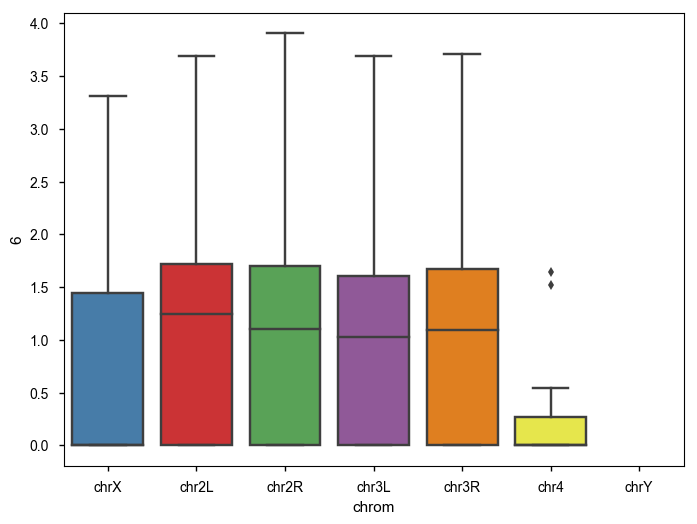

In [345]:
sns.boxplot('chrom', 6, order=CHROMS_CHR, data=cnts)

In [360]:
short.query('cluster == "6"').sort_values('avg_logFC', ascending=False)

primary_FBgn  gene_symbol          p_val  avg_logFC  pct.1  pct.2  \
12112  FBgn0265508      CR44370   1.284017e-96   1.877338  0.571  0.216   
11868  FBgn0264347      CR43803  1.176045e-182   1.489999  0.762  0.239   
10111  FBgn0052652      CR32652  3.287742e-168   1.403447  0.887  0.463   
7280   FBgn0037176      CG14456  7.762377e-194   1.344786  0.698  0.182   
9081   FBgn0040859      CR32658  6.333794e-148   1.328835  0.849  0.444   
12444  FBgn0270925       CG4836  4.751698e-151   1.269616  0.876  0.436   
6838   FBgn0036415       CG7768  4.396203e-163   1.262773  0.962  0.710   
11558  FBgn0262786      CG43167  1.005366e-182   1.242712  0.780  0.248   
10791  FBgn0250904      CG34434  3.744360e-163   1.217079  0.920  0.419   
2567   FBgn0027885        Aac11   8.419172e-41   1.216343  0.476  0.254   
11880  FBgn0264383      CR43835  1.360246e-163   1.197369  0.722  0.220   
5642   FBgn0034435         fest  4.930856e-143   1.190383  0.813  0.334   
5714   FBgn0034554      CG15227  2.565779e-167   1.177539  0.660  0.176   
7894   FBgn0038200       CG9920  6.674114e-109   1.163995  0.880  0.665   
10127  FBgn0052690      CR32690  1.132273e-148   1.162391  0.836  0.345   
165    FBgn0000615          exu  1.423156e-150   1.157614  0.840  0.365   
11856  FBgn0264307         orb2  3.931042e-142   1.151242  0.689  0.228   
1167   FBgn0011244       Hsp60B  8.441158e-109   1.138856  0.744  0.346   
5828   FBgn0034739       CG3927  1.433646e-144   1.131513  0.747  0.266   
12399  FBgn0267727          Pen  6.581687e-139   1.116981  0.978  0.640   
12349  FBgn0267366          mil  2.591028e-138   1.104682  0.882  0.503   
554    FBgn0003435           sm  8.581646e-131   1.095688  0.871  0.440   
5773   FBgn0034659       CG4021  9.474960e-152   1.095655  0.760  0.267   
4128   FBgn0031831       COX5BL  4.240074e-138   1.088587  0.900  0.499   
6558   FBgn0035915       S-Lap1  2.953818e-127   1.088479  0.902  0.550   
7932   FBgn0038252        BigH1  1.853396e-176   1.083801  0.704  0.187   
11600  FBgn0262945      CR43264   4.684801e-86   1.077565  0.844  0.529   
5625   FBgn0034416      CG15109  6.660316e-142   1.077168  0.893  0.439   
11865  FBgn0264344      CG43800  1.088166e-137   1.075228  0.793  0.309   
2703   FBgn0028667      Vha16-3  5.072637e-151   1.065032  0.731  0.240   
...            ...          ...            ...        ...    ...    ...   
11742  FBgn0263585      CR43610   5.657573e-28   0.258027  0.329  0.139   
9376   FBgn0050161      CG30161   5.107839e-18   0.257976  0.344  0.183   
994    FBgn0010278         Ssrp   2.810699e-08   0.257904  0.342  0.234   
7085   FBgn0036784       CG5103   3.889292e-31   0.257765  0.256  0.089   
660    FBgn0004057           Zw   3.607865e-16   0.257230  0.267  0.136   
7189   FBgn0036998       CG5969   1.090603e-11   0.257131  0.584  0.462   
11134  FBgn0261479         nero   1.390001e-09   0.257117  0.431  0.309   
10528  FBgn0085316      CG34287   2.744371e-28   0.257020  0.344  0.148   
10623  FBgn0086371         poly   9.713475e-11   0.256915  0.653  0.566   
2028   FBgn0024227         aurB   3.965705e-11   0.256138  0.302  0.187   
8435   FBgn0039160       CG5510   2.198901e-11   0.255482  0.389  0.266   
11223  FBgn0261624          I-3   1.363501e-30   0.255141  0.376  0.159   
11028  FBgn0260944         Rbp1   1.265308e-08   0.254928  0.582  0.488   
1972   FBgn0023167         SmD3   8.454373e-15   0.254729  0.673  0.482   
3255   FBgn0030268       Klp10A   5.975961e-11   0.254621  0.278  0.170   
6628   FBgn0036020       CG8336   1.238921e-10   0.254242  0.269  0.163   
3821   FBgn0031345      CG18132   1.285534e-31   0.254217  0.298  0.111   
2476   FBgn0027526       Ublcp1   1.671524e-09   0.253682  0.449  0.342   
10017  FBgn0052380         SMSr   2.885725e-15   0.253422  0.438  0.284   
12467  FBgn0283468         slmb   3.573542e-09   0.253124  0.333  0.231   
11898  FBgn0264468      CR43876   5.085577e-23   0.252472  0.324  0.148   
621    FBgn0003885  alphaTub84D

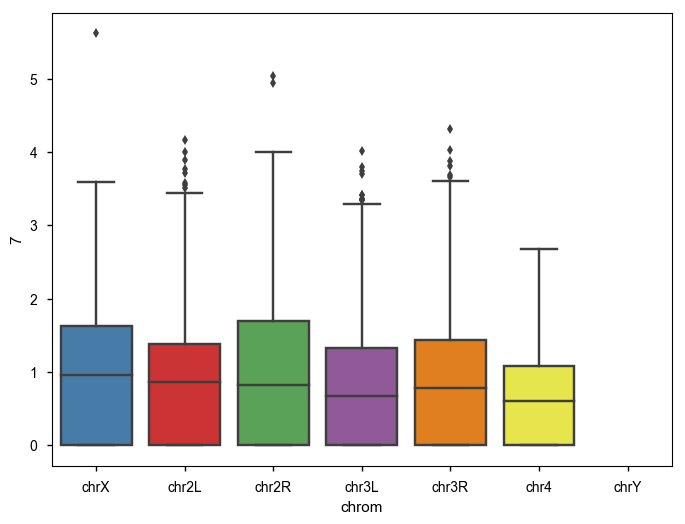

In [346]:
sns.boxplot('chrom', 7, order=CHROMS_CHR, data=cnts)

In [361]:
short.query('cluster == "7"').sort_values('avg_logFC', ascending=False)

primary_FBgn gene_symbol          p_val  avg_logFC  pct.1  pct.2  \
9046   FBgn0040765        luna  3.774500e-275   2.103969  0.968  0.288   
273    FBgn0001234    Hsromega  6.130279e-277   1.910936  0.950  0.297   
1746   FBgn0019661        roX1  1.675523e-277   1.814397  0.984  0.272   
9523   FBgn0051044     CR31044  1.570029e-278   1.738521  0.916  0.238   
9035   FBgn0040752      Prosap  4.901064e-194   1.666669  0.907  0.341   
10572  FBgn0085446     CG34417  4.923092e-171   1.503484  0.930  0.334   
11638  FBgn0263019     CR43314   0.000000e+00   1.367302  0.515  0.014   
443    FBgn0002921    Atpalpha  1.011235e-177   1.332074  0.925  0.370   
6643   FBgn0036043      CG8177  1.016005e-194   1.277617  0.943  0.332   
2421   FBgn0027287        Gmap  1.205724e-135   1.221219  0.782  0.259   
11660  FBgn0263039     CR43334  8.412623e-130   1.208380  0.601  0.161   
12560  FBgn0285917         sbb  3.276952e-142   1.177808  0.916  0.396   
11024  FBgn0260943        Rbp6  3.689775e-154   1.157620  0.676  0.177   
10564  FBgn0085432         pan  4.449760e-195   1.139405  0.683  0.165   
484    FBgn0003165         pum   2.408974e-85   1.128761  0.739  0.350   
10031  FBgn0052423        shep  1.049862e-145   1.097080  0.943  0.458   
11910  FBgn0264490      Eip93F  3.304383e-277   1.096099  0.646  0.090   
5961   FBgn0034903        sona  1.659234e-142   1.073966  0.642  0.173   
10388  FBgn0063495       GstE5  4.533075e-251   1.068974  0.612  0.089   
3395   FBgn0030505        NFAT  7.934938e-145   1.039025  0.599  0.157   
9631   FBgn0051324     CG31324  2.947728e-110   1.038218  0.628  0.198   
12483  FBgn0283499         InR   1.284842e-90   1.026118  0.653  0.259   
10034  FBgn0052425     CG32425   3.142571e-92   0.992383  0.685  0.308   
4785   FBgn0032901         sky  2.486853e-193   0.978519  0.687  0.159   
11084  FBgn0261260         mgl   3.251683e-93   0.976372  0.898  0.431   
61     FBgn0000163         baz  1.504012e-140   0.969383  0.737  0.234   
11382  FBgn0262160      CG9932  1.273592e-115   0.963488  0.753  0.257   
11160  FBgn0261556     CG42674  3.376560e-100   0.963187  0.560  0.170   
1239   FBgn0011666         msi  7.529100e-102   0.957131  0.825  0.395   
5191   FBgn0033649         pyr   5.975490e-93   0.952299  0.542  0.169   
...            ...         ...            ...        ...    ...    ...   
8254   FBgn0038826         Syp   1.002861e-28   0.267613  0.880  0.600   
6299   FBgn0035444     CG12012   3.753325e-24   0.266278  0.345  0.167   
7186   FBgn0036980      RhoBTB   7.053871e-17   0.264476  0.256  0.129   
5278   FBgn0033817      GstE14   1.518231e-33   0.263223  0.261  0.085   
1265   FBgn0011747         Ank   2.280895e-11   0.263112  0.288  0.172   
9760   FBgn0051712     CG31712   5.363808e-09   0.262628  0.297  0.199   
1847   FBgn0020621         Pkn   3.057018e-23   0.261957  0.263  0.112   
10381  FBgn0063491       GstE9   3.889284e-30   0.261725  0.370  0.157   
9039   FBgn0040754     CG17059   1.141944e-25   0.261634  0.787  0.561   
10456  FBgn0083978     CG17672   9.780285e-45   0.261097  0.299  0.088   
8818   FBgn0039923       MED26   3.750114e-11   0.260400  0.578  0.418   
7989   FBgn0038349        AOX3   1.398061e-21   0.260139  0.270  0.120   
2450   FBgn0027492         wdb   4.306108e-14   0.258530  0.392  0.243   
1003   FBgn0010300        brat   7.216083e-19   0.257607  0.349  0.184   
3217   FBgn0030183     CG15309   1.974106e-10   0.257417  0.315  0.202   
10677  FBgn0086757         cbs   1.670378e-13   0.256438  0.311  0.181   
10932  FBgn0260441       RpS12   8.684249e-20   0.256071  0.991  0.902   
9078   FBgn0040850     CG15210   4.492673e-40   0.255927  0.340  0.117   
10212  FBgn0053169     CG33169   8.443517e-27   0.255146  0.392  0.190   
3328   FBgn0030362  regucalcin   1.635876e-26   0.254634  0.324  0.139   
1496   FBgn0015031        cype   7.918191e-23   0.254614  0.977  0.881   
7093   FBgn0036805       Chmp1   2.965628e-20   0.253838  0.744  0.547   
10142  FBg

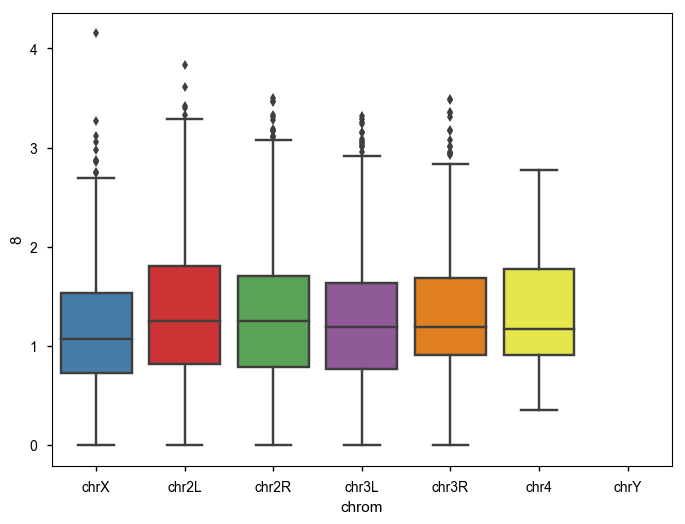

In [347]:
sns.boxplot('chrom', 8, order=CHROMS_CHR, data=cnts)

In [362]:
short.query('cluster == "8"').sort_values('avg_logFC', ascending=False)

primary_FBgn  gene_symbol          p_val  avg_logFC  pct.1  pct.2  \
6412   FBgn0035608       blanks  2.878328e-269   1.929373  0.995  0.340   
12055  FBgn0265201      CG44261   0.000000e+00   1.651117  0.973  0.176   
5643   FBgn0034435         fest  5.207330e-228   1.559297  0.973  0.332   
9986   FBgn0052259      CG32259  2.089456e-220   1.545721  0.992  0.421   
10793  FBgn0250904      CG34434  7.834097e-222   1.533806  0.992  0.421   
3997   FBgn0031623       Taf12L  1.289409e-220   1.515693  0.992  0.421   
12170  FBgn0266000      CG44774  1.537388e-190   1.513256  1.000  0.519   
987    FBgn0010258         Rbp4   0.000000e+00   1.506155  0.937  0.156   
3427   FBgn0030563  betaNACtes2   0.000000e+00   1.462594  0.877  0.116   
6379   FBgn0035571      CG12493  4.317808e-233   1.434850  0.989  0.346   
12102  FBgn0265418      CR44330   0.000000e+00   1.414790  0.932  0.103   
5885   FBgn0034822       RpL37b  7.626272e-229   1.414306  0.978  0.312   
10173  FBgn0052971      CG32971  2.328225e-225   1.368863  0.964  0.292   
555    FBgn0003435           sm  3.470618e-192   1.350776  0.986  0.439   
5263   FBgn0033770          wuc   0.000000e+00   1.336029  0.962  0.207   
12273  FBgn0266710          hog  4.660137e-303   1.300403  0.934  0.194   
4454   FBgn0032375      CG14932  2.040351e-228   1.294011  0.940  0.265   
9131   FBgn0041103          nht   0.000000e+00   1.283576  0.937  0.147   
11489  FBgn0262606      CR43132  2.562004e-247   1.272738  0.921  0.207   
1528   FBgn0015299     Ssb-c31a  9.641601e-182   1.266650  0.981  0.461   
12101  FBgn0265417      CG44329   0.000000e+00   1.255100  0.825  0.035   
2455   FBgn0027494       RpS10a  1.164998e-207   1.243240  0.978  0.313   
6943   FBgn0036531       CG6244   0.000000e+00   1.236450  0.902  0.072   
3918   FBgn0031483       CG9641   0.000000e+00   1.227041  0.926  0.168   
11358  FBgn0262104      CG42857  2.675017e-268   1.225945  0.926  0.181   
8413   FBgn0039129       RpS19b  2.477529e-191   1.203864  0.984  0.351   
1268   FBgn0011760          ctp  3.907888e-167   1.168133  0.997  0.740   
259    FBgn0001225        Hsp26  2.787841e-180   1.163422  0.997  0.752   
2292   FBgn0026370         SRPK  1.329149e-202   1.159944  0.951  0.340   
11879  FBgn0264383      CR43835  3.865724e-192   1.154425  0.861  0.218   
...            ...          ...            ...        ...    ...    ...   
315    FBgn0001961        Arpc1   2.660791e-52   0.253658  0.781  0.326   
4207   FBgn0031954      CG14537   1.465499e-97   0.253290  0.760  0.211   
7632   FBgn0037744       CG8417   8.206447e-96   0.252988  0.691  0.191   
8326   FBgn0038964        Nop56   1.791707e-61   0.252779  0.776  0.285   
3655   FBgn0031060      CG14231  6.417428e-117   0.252629  0.489  0.093   
11301  FBgn0261872        scaf6  5.931895e-127   0.252493  0.533  0.100   
3187   FBgn0030088       Arfrp1  3.837216e-128   0.252430  0.585  0.117   
3624   FBgn0030990       CG7556  3.289464e-118   0.252292  0.650  0.150   
10369  FBgn0062449      CG13197  4.675353e-117   0.252266  0.596  0.130   
5348   FBgn0033916     Usp20-33  2.247599e-177   0.252138  0.514  0.069   
5798   FBgn0034704       CG6758  4.538864e-151   0.252020  0.511  0.080   
6070   FBgn0035063       CG3594   8.533138e-77   0.251828  0.555  0.151   
8791   FBgn0039868      CG11563  4.008424e-107   0.251659  0.623  0.146   
1206   FBgn0011481         Ssdp   1.182488e-56   0.251642  0.754  0.281   
11968  FBgn0264819      CR44027  8.011552e-125   0.251477  0.716  0.158   
128    FBgn0000455        Dip-C   3.218933e-99   0.251473  0.598  0.147   
8089   FBgn0038551          Odj  1.020346e-158   0.251255  0.596  0.103   
3855   FBgn0031403      CG15387   1.089428e-82   0.251212  0.727  0.232   
6269   FBgn0035405      CG15812  1.417081e-192   0.251079  0.426  0.044   
6606   FBgn0036000       CG3434  3.335469e-121   0.250994  0.560  0.114   
1280   FBgn0011785        BRWD3  3.428407e-156   0.250766  0.456  0.063   
3570   FBgn0030871       CG8142

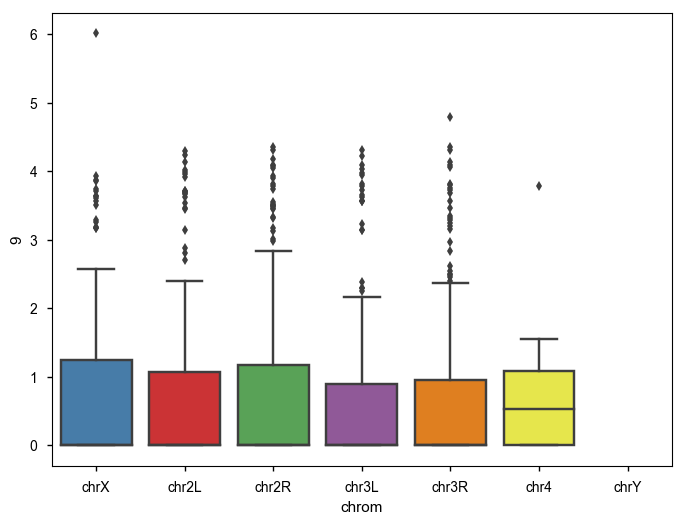

In [348]:
sns.boxplot('chrom', 9, order=CHROMS_CHR, data=cnts)

In [363]:
short.query('cluster == "9"').sort_values('avg_logFC', ascending=False)

primary_FBgn      gene_symbol          p_val  avg_logFC  pct.1  pct.2  \
9027   FBgn0040718          CG15353   0.000000e+00   3.602245  0.966  0.092   
3846   FBgn0031381            Npc2a  3.733227e-202   3.240656  0.962  0.285   
3626   FBgn0030993             Mec2   0.000000e+00   2.822946  0.886  0.019   
11290  FBgn0261836           Msp300  3.531483e-151   2.588231  0.856  0.254   
2328   FBgn0026562            SPARC  2.161630e-113   2.542759  0.771  0.254   
92     FBgn0000299           Col4a1   0.000000e+00   2.496151  0.716  0.013   
8263   FBgn0038842             hdly  5.686418e-173   2.481723  0.763  0.158   
447    FBgn0002945              nkd   0.000000e+00   2.475920  0.792  0.079   
2221   FBgn0026084              cib  8.502700e-153   2.217249  1.000  0.528   
5650   FBgn0034443              cer  1.982356e-144   2.190250  0.932  0.344   
751    FBgn0004449            Ten-m   0.000000e+00   2.121712  0.682  0.028   
12601  FBgn0285955             cv-c  7.601246e-182   2.066130  0.767  0.140   
12464  FBgn0283451               br  6.470878e-260   2.020272  0.860  0.120   
3210   FBgn0030158           CG9686   0.000000e+00   2.014949  0.572  0.011   
8955   FBgn0040398          CG14629   0.000000e+00   1.988303  0.784  0.027   
12441  FBgn0268063              ltl   0.000000e+00   1.956912  0.703  0.005   
2518   FBgn0027598            cindr  2.946086e-163   1.947818  0.915  0.293   
408    FBgn0002733  E(spl)mbeta-HLH  5.642866e-186   1.896152  0.911  0.215   
3545   FBgn0030796           CG4829   0.000000e+00   1.884026  0.657  0.004   
4784   FBgn0032900          CG14401   0.000000e+00   1.880015  0.746  0.026   
8390   FBgn0039098            GILT3   0.000000e+00   1.869781  0.737  0.026   
1357   FBgn0013733             shot  4.251363e-161   1.851420  0.746  0.144   
357    FBgn0002543            robo2  5.551801e-169   1.842530  0.716  0.125   
3606   FBgn0030955           CG6891  3.056818e-156   1.836788  0.911  0.268   
9781   FBgn0051777          CG31777   0.000000e+00   1.820018  0.699  0.015   
222    FBgn0001149            GstD1  2.046644e-122   1.777298  0.992  0.776   
2032   FBgn0024238              Fim  1.034821e-160   1.763687  0.818  0.190   
1745   FBgn0019660             roX2   1.966255e-51   1.714596  0.568  0.225   
11315  FBgn0261988            Gprk2  5.811615e-162   1.707790  0.801  0.184   
764    FBgn0004606             zfh1  1.576189e-211   1.685557  0.750  0.114   
...            ...              ...            ...        ...    ...    ...   
7362   FBgn0037328           RpL35A   1.682604e-10   0.265149  0.936  0.827   
130    FBgn0000464              Lar   2.488278e-09   0.264747  0.263  0.135   
1887   FBgn0021872             Xbp1   1.186325e-11   0.264647  0.373  0.207   
440    FBgn0002914              Myb   1.147457e-15   0.264562  0.322  0.140   
6484   FBgn0035767             Cln7   2.064950e-36   0.263779  0.254  0.055   
5873   FBgn0034804           CG3831   4.796359e-14   0.262263  0.407  0.199   
2524   FBgn0027601             pdgy   2.108027e-17   0.261978  0.386  0.163   
3226   FBgn0030208          PPP4R2r   1.127986e-11   0.261728  0.314  0.148   
3080   FBgn0029887           CG3198   4.732923e-10   0.260329  0.314  0.164   
5328   FBgn0033889           CG6701   6.453540e-08   0.260043  0.551  0.384   
6869   FBgn0036448              mop   1.955811e-24   0.259294  0.301  0.098   
7116   FBgn0036825            RpL26   5.886811e-11   0.258920  0.941  0.889   
1929   FBgn0022349           CG1910   2.397972e-08   0.257545  0.331  0.176   
1687   FBgn0016797              fz2   3.163370e-20   0.257390  0.377  0.149   
9367   FBgn0050122          CG30122   1.800184e-12   0.257100  0.318  0.154   
1668   FBgn0016696          Pitslre   1.523587e-12   0.255974  0.331  0.163   
10950  FBgn0260462          CG12163   1.400881e-10   0.255870  0.424  0.248   
10809  FBgn0259173             corn   1.099435e-26   0.255640  0.254  0.071   
2187   FBgn0025726           unc-13   3.358092e-10   0.2

In [349]:
sns.boxplot('chrom', 10, order=CHROMS_CHR, data=cnts)

In [364]:
short.query('cluster == "10"').sort_values('avg_logFC', ascending=False)

primary_FBgn   gene_symbol          p_val  avg_logFC  pct.1  pct.2  \
4779   FBgn0032897        CG9336   2.655573e-87   2.103348  0.374  0.055   
170    FBgn0000635          Fas2  1.072558e-213   2.101423  0.950  0.199   
9741   FBgn0051676       CG31676  1.638566e-145   2.025631  1.000  0.450   
3583   FBgn0030899          Hesr   0.000000e+00   1.838048  0.895  0.092   
1068   FBgn0010453          Wnt4  2.536338e-252   1.595706  0.895  0.124   
6535   FBgn0035868        CG7194  7.562278e-137   1.482695  0.932  0.305   
281    FBgn0001257         ImpL2  1.315285e-161   1.471759  0.840  0.173   
188    FBgn0001090           bnb  1.082315e-146   1.411991  0.895  0.217   
11908  FBgn0264478       CG43886  1.317701e-161   1.402393  0.863  0.168   
8429   FBgn0039154         Npc2f  7.188159e-193   1.378396  0.836  0.140   
11715  FBgn0263392           Tet  2.996551e-230   1.343901  0.808  0.108   
435    FBgn0002868          MtnA   1.882542e-46   1.335100  0.941  0.710   
2329   FBgn0026562         SPARC  1.013864e-141   1.232652  0.913  0.251   
673    FBgn0004108           Nrt   2.883183e-99   1.193142  0.699  0.166   
775    FBgn0004646          ogre  8.607999e-226   1.188693  0.863  0.114   
8802   FBgn0039886        CG2003  4.462555e-165   1.146608  0.790  0.143   
6851   FBgn0036433        CG9628  7.260230e-261   1.137393  0.753  0.077   
538    FBgn0003391           shg  2.061181e-115   1.125429  0.909  0.269   
4176   FBgn0031902          Wnt6   0.000000e+00   1.121910  0.680  0.014   
378    FBgn0002609  E(spl)m3-HLH  4.835770e-186   1.098805  0.831  0.129   
24     FBgn0000071           Ama   0.000000e+00   1.080477  0.653  0.044   
3713   FBgn0031145         Ntf-2   1.172379e-78   1.055022  0.913  0.533   
3899   FBgn0031453          Bacc   1.586558e-70   1.044105  0.890  0.417   
10683  FBgn0086758        chinmo   1.642344e-94   1.043399  0.863  0.317   
6323   FBgn0035480       CG14984   0.000000e+00   1.028318  0.425  0.011   
5801   FBgn0034709          Swim  3.853386e-115   0.993994  0.808  0.208   
5385   FBgn0033968           hui   0.000000e+00   0.979756  0.584  0.016   
7620   FBgn0037723          SpdS   8.779637e-89   0.975072  0.845  0.283   
2858   FBgn0029002        miple2   6.399147e-90   0.968788  0.927  0.354   
156    FBgn0000568        Eip75B  9.447499e-110   0.952357  0.822  0.220   
...            ...           ...            ...        ...    ...    ...   
7915   FBgn0038224       ATPsynE   5.429201e-15   0.260151  0.995  0.913   
6211   FBgn0035272        mRpL46   1.941893e-15   0.260135  0.479  0.240   
6126   FBgn0035148        CG3402   1.774629e-19   0.260115  0.479  0.213   
979    FBgn0010238           Lac   6.627557e-38   0.259938  0.397  0.106   
11374  FBgn0262124           uex   1.181719e-12   0.259871  0.685  0.413   
7792   FBgn0038043       CG17202   2.540932e-15   0.259640  0.817  0.510   
10181  FBgn0053002        mRpL27   8.866880e-19   0.259455  0.749  0.406   
488    FBgn0003189             r   1.724674e-23   0.259314  0.356  0.122   
8302   FBgn0038924        CG6028   3.951291e-17   0.258736  0.667  0.367   
2370   FBgn0026872       CG14777   4.285657e-44   0.258289  0.447  0.118   
11154  FBgn0261552            ps   2.252514e-15   0.258229  0.799  0.496   
12415  FBgn0267795           Frl   2.984043e-15   0.258106  0.826  0.533   
11241  FBgn0261703           gce   7.035361e-32   0.257767  0.311  0.079   
12595  FBgn0285952          eEF5   1.382229e-15   0.257218  0.995  0.907   
7959   FBgn0038302        CG4210   9.292907e-37   0.256835  0.324  0.079   
5338   FBgn0033902         eIF3m   3.811240e-11   0.256498  0.712  0.455   
10201  FBgn0053120       CG33120  1.790863e-154   0.255978  0.279  0.014   
7368   FBgn0037330        mRpL44   2.639710e-16   0.255425  0.452  0.216   
6362   FBgn0035534         mRpS6   2.273588e-14   0.255046  0.726  0.413   
10641  FBgn0086472         RpS25   3.948447e-09   0.254942  1.000  0.941   
6082   FBgn0035083        Tina-1   2.573827e-18   0.25

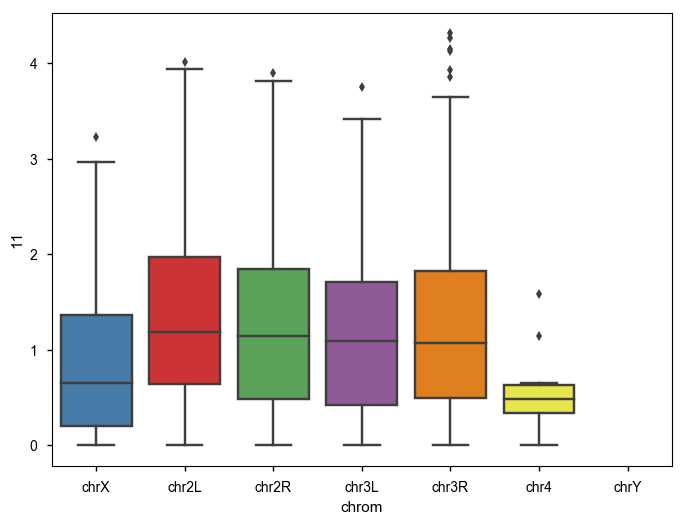

In [350]:
sns.boxplot('chrom', 11, order=CHROMS_CHR, data=cnts)

In [365]:
short.query('cluster == "11"').sort_values('avg_logFC', ascending=False)

primary_FBgn gene_symbol          p_val  avg_logFC  pct.1  pct.2  \
7893   FBgn0038200      CG9920   2.444597e-33   1.652002  1.000  0.675   
12138  FBgn0265648     CR44455   6.333795e-35   1.586904  1.000  0.683   
631    FBgn0003889  betaTub85D   9.351944e-34   1.572736  1.000  0.611   
9294   FBgn0046297      CR9284   1.197355e-32   1.507448  1.000  0.683   
3913   FBgn0031476      CG8813   5.193998e-36   1.389576  1.000  0.431   
10160  FBgn0052835     CR32835   6.328312e-35   1.387319  1.000  0.445   
7921   FBgn0038225        soti   4.494065e-33   1.384332  1.000  0.502   
10009  FBgn0052351      S-Lap2   2.236088e-33   1.380950  1.000  0.484   
6450   FBgn0035709      eIF4E4   2.425617e-35   1.365830  1.000  0.440   
6598   FBgn0035988      CG3982   3.296199e-31   1.364646  1.000  0.601   
6333   FBgn0035491    Dpy-30L2   1.976436e-34   1.358556  1.000  0.522   
6557   FBgn0035915      S-Lap1   9.952595e-30   1.356393  1.000  0.566   
4069   FBgn0031728      Hsp60C   3.846601e-33   1.343145  1.000  0.522   
7332   FBgn0037283     CG14658   4.340585e-33   1.341639  1.000  0.516   
9871   FBgn0051948     CG31948   5.460991e-35   1.340292  1.000  0.426   
10879  FBgn0259795    loopin-1   1.917576e-29   1.318773  1.000  0.596   
8082   FBgn0038539       Atg8b   4.729734e-33   1.312161  1.000  0.526   
2620   FBgn0028412      Mst33A   4.225196e-35   1.303326  1.000  0.424   
8011   FBgn0038373      CG4546   1.987298e-34   1.302731  1.000  0.428   
5006   FBgn0033286      CG2127   5.587915e-29   1.298835  1.000  0.598   
8186   FBgn0038694      CG5217   1.615623e-34   1.298595  1.000  0.454   
9130   FBgn0041102         ocn   3.823650e-30   1.283925  1.000  0.815   
4078   FBgn0031751      CG9016   5.215814e-28   1.269643  1.000  0.640   
5966   FBgn0034907      CG5539   7.136755e-35   1.255050  1.000  0.427   
6839   FBgn0036415      CG7768   3.112821e-27   1.254190  1.000  0.722   
5373   FBgn0033953     CG12861   4.601389e-29   1.253315  1.000  0.667   
4190   FBgn0031941    ATPsynGL   9.578035e-33   1.249988  1.000  0.532   
10889  FBgn0259922       Skadu   4.142574e-42   1.239995  1.000  0.316   
7135   FBgn0036882      CG9279   9.052966e-32   1.236983  1.000  0.484   
8337   FBgn0038979       tHMG2   1.809542e-29   1.235856  1.000  0.661   
...            ...         ...            ...        ...    ...    ...   
11583  FBgn0262872        milt   3.784188e-41   0.256159  1.000  0.188   
12033  FBgn0265105     CR44207  5.407694e-107   0.256138  0.964  0.079   
7060   FBgn0036762      CG7430   3.469292e-12   0.255994  1.000  0.404   
4495   FBgn0032439        Ref2   5.791439e-64   0.255859  0.964  0.121   
3489   FBgn0030660      CG8097   2.138790e-28   0.255730  1.000  0.218   
9411   FBgn0050325     CG30325  8.688359e-175   0.255686  0.891  0.043   
12195  FBgn0266358     CR45006  4.069748e-131   0.255353  0.891  0.057   
2342   FBgn0026592         Fie  2.672358e-196   0.255274  0.891  0.038   
5673   FBgn0034479      CG8654  2.301172e-146   0.254977  0.927  0.055   
12308  FBgn0266979     CR45430  8.603194e-194   0.254950  0.855  0.035   
3992   FBgn0031620     CG11929   1.141619e-58   0.254864  0.964  0.133   
12014  FBgn0265063     CG44174  1.173670e-130   0.254858  0.818  0.048   
4265   FBgn0032053      mRpL51   5.778213e-16   0.254797  1.000  0.342   
4745   FBgn0032851     CG13970   5.142745e-69   0.254783  0.927  0.107   
12383  FBgn0267526     CR45866  8.246347e-172   0.254044  0.964  0.050   
8253   FBgn0038818        Nep4  1.684781e-148   0.253570  0.818  0.043   
4448   FBgn0032372      CG4988   1.274889e-72   0.253099  0.891  0.098   
11981  FBgn0264877     CR44068   4.175424e-90   0.253009  0.836  0.071   
6025   FBgn0035004     Pgam5-2  4.733672e-124   0.252404  0.818  0.051   
5941   FBgn0034876         wmd   2.777357e-24   0.252107  0.964  0.243   
11795  FBgn0263874     CR43721  1.351051e-170   0.251689  0.891  0.044   
2507   FBgn0027579        mino   1.018296e-76   0.251498  0.945  0.105   
12387  FBg

In [118]:
def boxplot(data, expressed, mask, chrom, ax, name=None):
    _data = data.loc[expressed, mask]
    _data['median'] = _data.median(axis=1)
    _data = _data.join(chrom, how='inner')
    med_x, med_major, prop_dcc = estimate_dcc('chrom', 'median', _data)

    _data['chrom'] = _data['chrom'].map(lambda x: x.replace('chr', ''))
    
    ORDER = ['X', '2L', '2R', '3L', '3R', '4']
    sns.boxplot(_data['chrom'], _data['median'], order=ORDER, notch=True, boxprops={"facecolor": 'w'}, ax=ax, flierprops={'alpha': .6})
    ax.axhline(med_major, ls=':', lw=2, color=nbconfig.color_c1)
    ax.set_xlabel('Chromosome')
    ax.set_ylabel('Median Normalized Expression')
    
    # Clean up the pvalue for plotting
    pvalues = {}
    iqr = 0
    chromX = _data[_data.chrom == 'X']
    for g, df in _data.groupby('chrom'):
        _iqr = sns.utils.iqr(df['median'])
        if _iqr > iqr:
            iqr = _iqr
        if g == 'X':
            continue
        if g == 'M':
            continue
        _, pval = mannwhitneyu(chromX['median'], df['median'], alternative='two-sided')
        if pval <= 0.001:
            pvalues[g] = '***'

    multiplier = .35
    xloc = ORDER.index('X')
    for k, v in pvalues.items():
        oloc = ORDER.index(k)
        pval = v
        y, h, col = iqr + iqr * multiplier, .1, 'k'
        plt.plot([xloc, xloc, oloc, oloc], [y, y+h, y+h, y], lw=1, c=col)
        plt.text((xloc+oloc)*.5, y+h+.01, f"{pval}", ha='center',
                 va='bottom', color=col)
        multiplier += .2
        
    if name is not None:
        ax.set_title(name)

In [119]:
def get_mask(cluster):
    return clusters[clusters['res.0.4'] == cluster].index.tolist()

In [120]:
def _combo(clus):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(1/2))
    _dat = tsne.join(clusters['res.0.4'])
    _dat['colors'] = _dat['res.0.4'] == clus
    TSNEPlot(data=_dat, hue='colors', cmap=[greys[0], _colors[clus]], ax=ax1)
    boxplot(norm, expressed, get_mask(clus), nbconfig.fbgn2chrom, ax2)
    ax1.legend('')
    ax1.set_xlabel('')
    ax1.set_ylabel('')

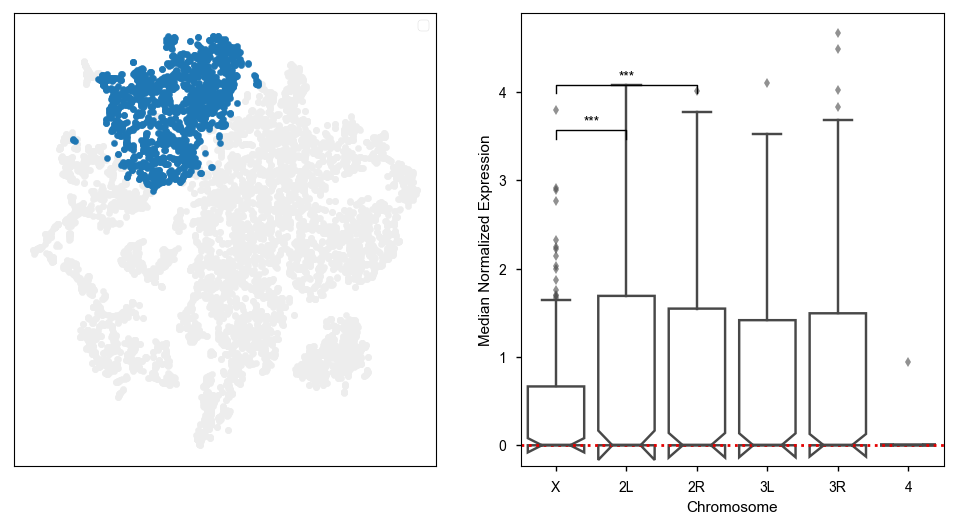

In [121]:
_combo(0)

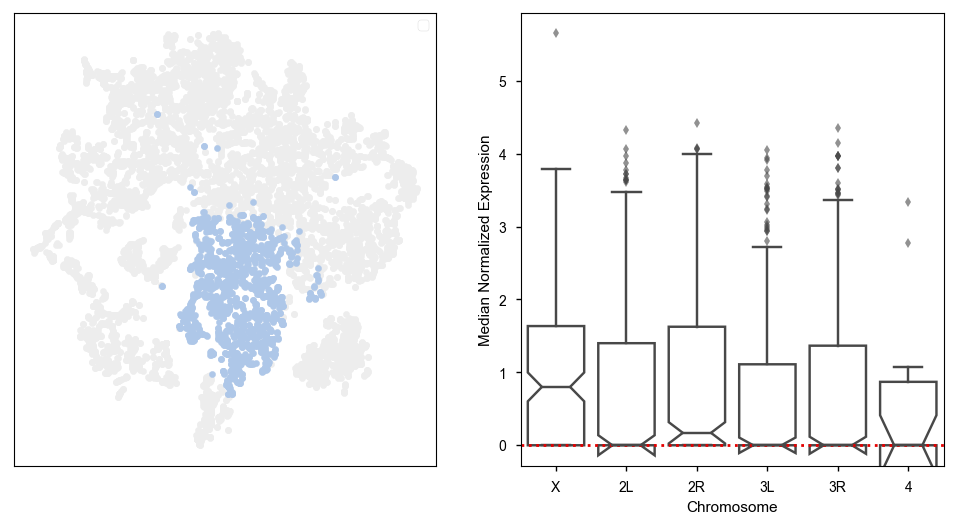

In [122]:
_combo(1)

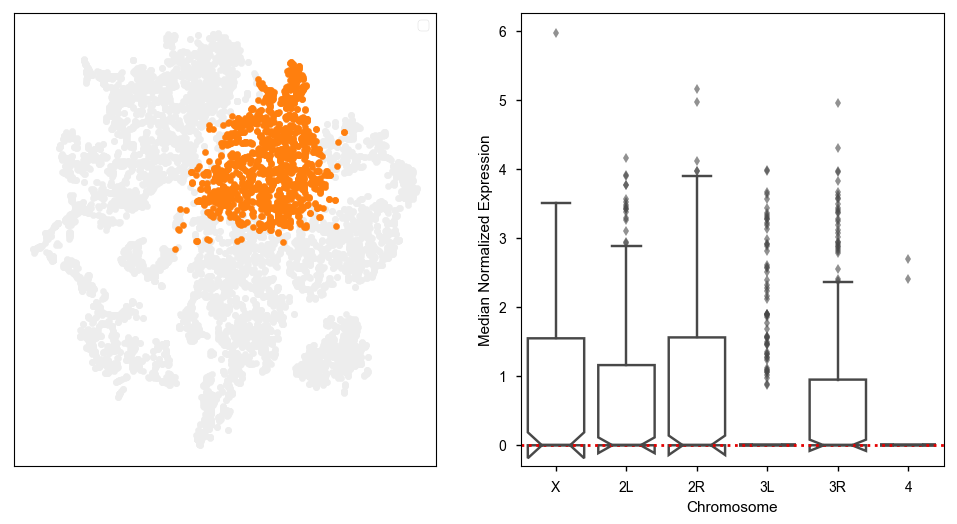

In [123]:
_combo(2)

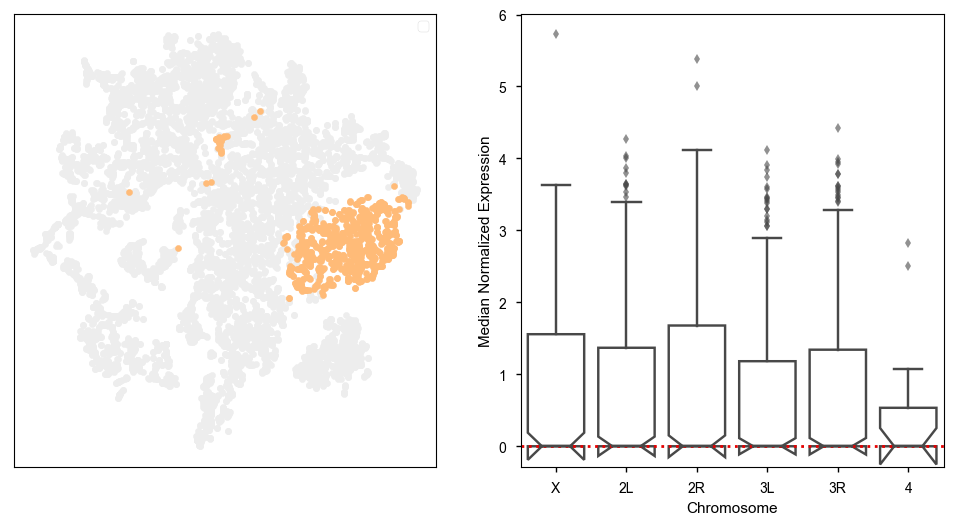

In [124]:
_combo(3)

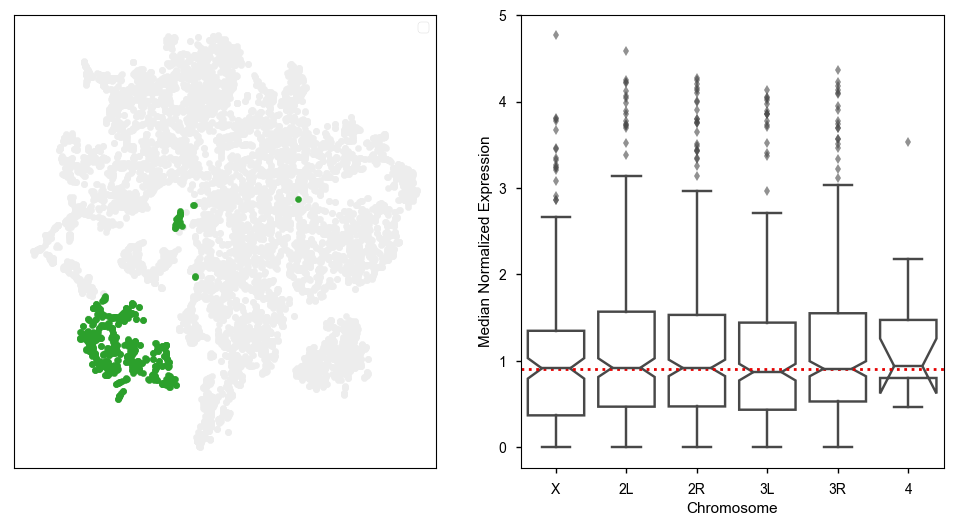

In [125]:
_combo(4)

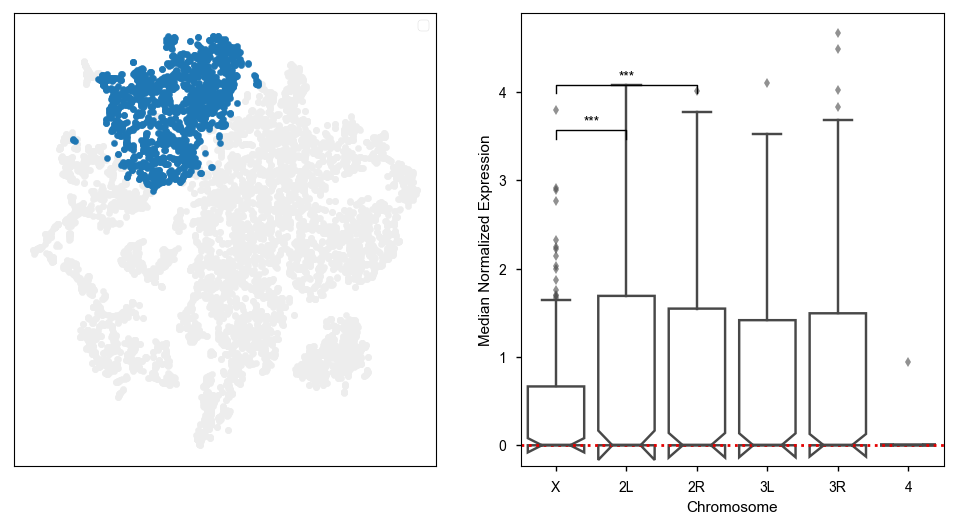

In [126]:
_combo(0)

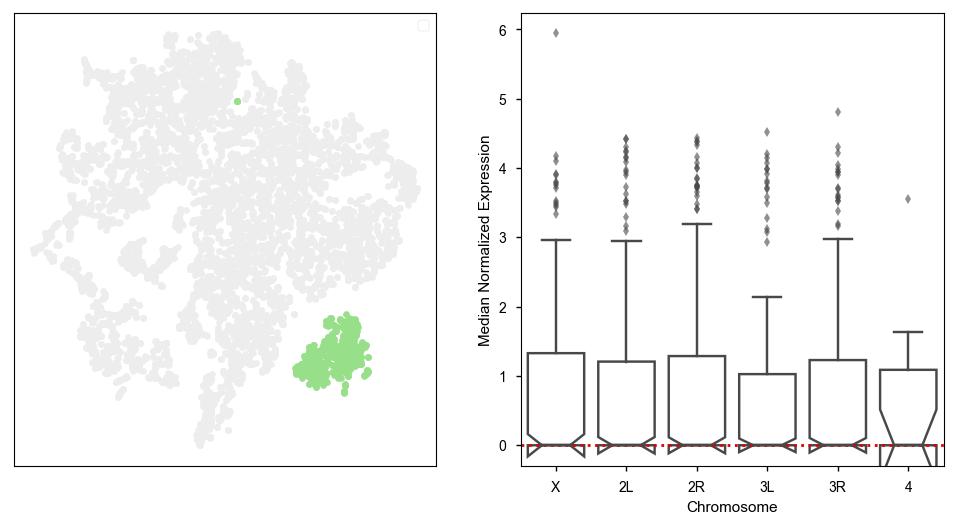

In [127]:
_combo(5)

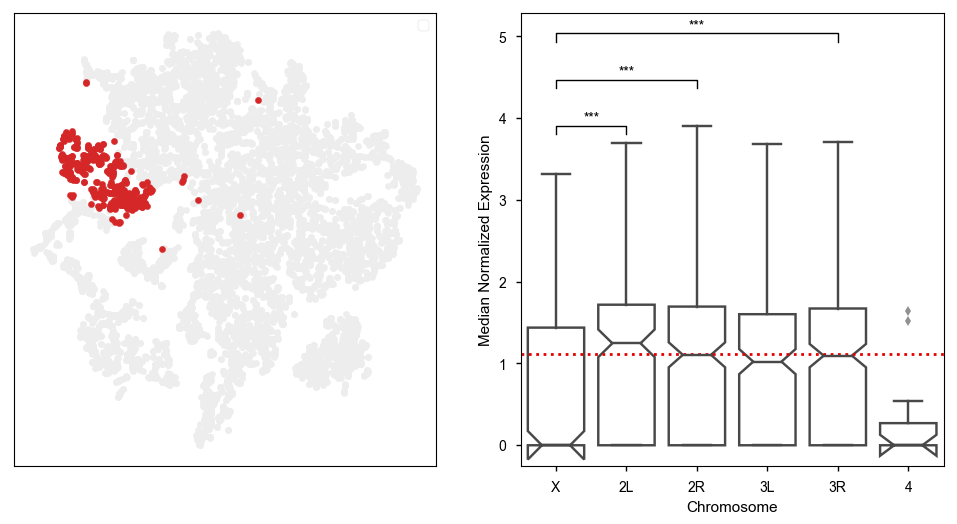

In [128]:
_combo(6)

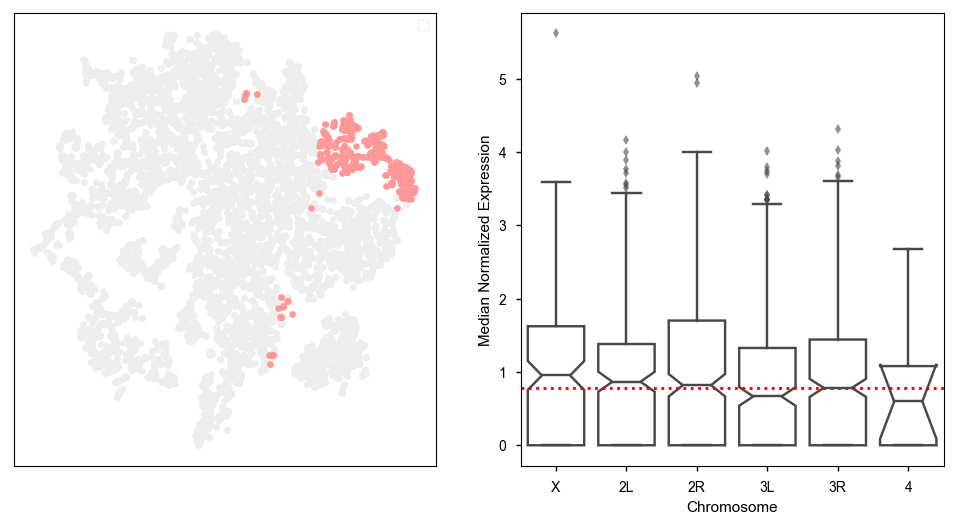

In [129]:
_combo(7)

In [130]:
_combo(8)

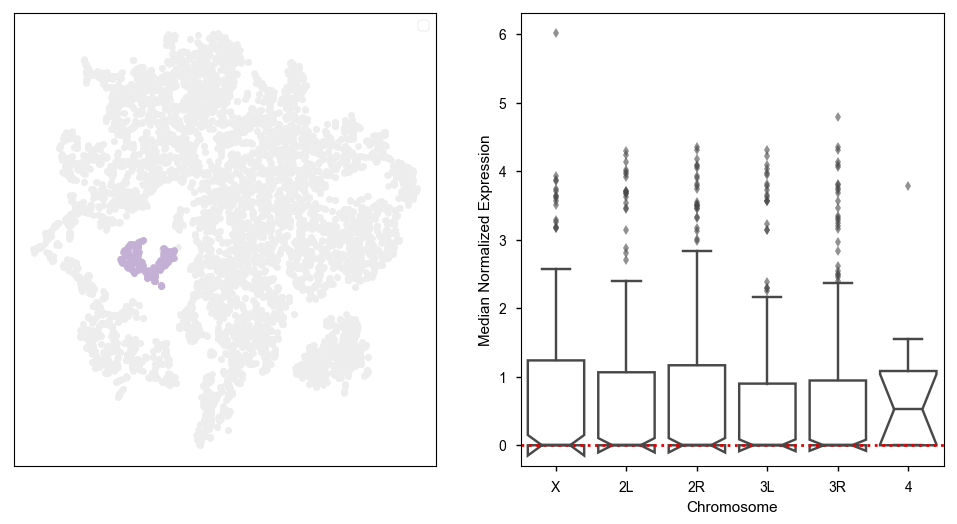

In [131]:
_combo(9)

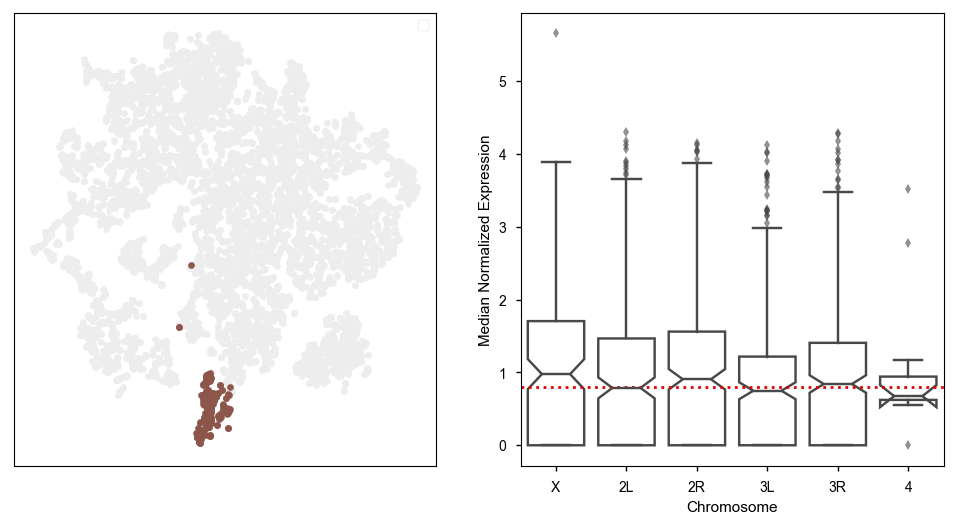

In [132]:
_combo(10)

In [113]:
_combo(11)

In [154]:
classes.join(Y)

class         Y
rep1_AAACCTGAGACAAGCC          Late Germ Cells         0
rep1_AAACCTGAGCTTATCG            Somatic Cells         0
rep1_AAACCTGGTGTAATGA            Somatic Cells         0
rep1_AAACCTGGTTCATGGT          Late Germ Cells   1.89773
rep1_AAACCTGTCCCTCTTT            Somatic Cells         0
rep1_AAACGGGAGACTGGGT            Somatic Cells         0
rep1_AAACGGGCACAGTCGC          Late Germ Cells         0
rep1_AAACGGGGTCGCGTGT          Late Germ Cells   4.98825
rep1_AAACGGGGTGTTAAGA            Somatic Cells         0
rep1_AAACGGGTCGTCCAGG            Somatic Cells         0
rep1_AAACGGGTCTTGTATC            Somatic Cells         0
rep1_AAAGATGAGCGCCTCA            Somatic Cells         0
rep1_AAAGATGAGTATCGAA            Somatic Cells         0
rep1_AAAGATGAGTGGTAGC            Somatic Cells         0
rep1_AAAGATGGTGTGGTTT            Somatic Cells         0
rep1_AAAGCAAAGGCATGTG            Somatic Cells         0
rep1_AAAGCAACAGCTCGCA            Somatic Cells         0
rep1_AAAGCAACAGGCTGAA          Late Germ Cells   1.11625
rep1_AAAGCAAGTCTAGGTT         Early Germ Cells         0
rep1_AAAGCAAGTTGAGGTG            Somatic Cells         0
rep1_AAAGTAGAGGCTAGCA            Somatic Cells         0
rep1_AAAGTAGCACTGTTAG          Late Germ Cells         0
rep1_AAAGTAGTCCGCATAA          Late Germ Cells         0
rep1_AAAGTAGTCTTGTACT            Somatic Cells         0
rep1_AAATGCCCACTGAAGG            Somatic Cells         0
rep1_AAATGCCGTAAAGGAG            Somatic Cells         0
rep1_AAATGCCGTTCGTCTC          Late Germ Cells         0
rep1_AAATGCCTCGATAGAA          Late Germ Cells   2.05715
rep1_AAATGCCTCGCAAGCC          Late Germ Cells         0
rep1_AACACGTCACCAGGTC          Late Germ Cells         0
...                                        ...       ...
rep3_TTGGCAAAGTACACCT         Early Germ Cells  0.636701
rep3_TTGGCAACATTGGTAC            Somatic Cells         0
rep3_TTGGCAAGTTCCCTTG          Late Germ Cells   1.84357
rep3_TTGGCAATCGGTTCGG            Somatic Cells         0
rep3_TTGTAGGAGGAGTCTG            Somatic Cells         0
rep3_TTGTAGGCAGACTCGC            Somatic Cells         0
rep3_TTGTAGGGTCCTGCTT         Early Germ Cells         0
rep3_TTGTAGGTCCTCGCAT            Somatic Cells         0
rep3_TTGTAGGTCTGGTGTA  Transitional Germ Cells   2.18798
rep3_TTTACTGAGATGCCAG            Somatic Cells         0
rep3_TTTACTGCAGCTCCGA            Somatic Cells         0
rep3_TTTACTGTCAACGGGA            Somatic Cells         0
rep3_TTTATGCGTAGCGCTC          Late Germ Cells   2.11532
rep3_TTTCCTCAGAAGGCCT         Early Germ Cells   0.77284
rep3_TTTCCTCAGACGACGT          Late Germ Cells   6.08653
rep3_TTTCCTCCAGGGTACA         Early Germ Cells         0
rep3_TTTCCTCGTTACCAGT          Late Germ Cells   1.59802
rep3_TTTCCTCGTTGCCTCT            Somatic Cells         0
rep3_TTTCCTCTCGGTCCGA            Somatic Cells         0
rep3_TTTGCGCAGCCCGAAA            Somatic Cells         0
rep3_TTTGCGCCATCCGTGG            Somatic Cells         0
rep3_TTTGGTTTCAGCATGT         Early Germ Cells   1.87675
rep3_TTTGGTTTCGTGGACC            Somatic Cells         0
rep3_TTTGTCAAGACTAGAT          Late Germ Cells   1.78475
rep3_TTTGTCAAGCCAGTTT         Early Germ Cells         0
rep3_TTTGTCAAGGTGACCA          Late Germ Cells  0.925264
rep3_TTTGTCACACTTGGAT            Somatic Cells         0
rep3_TTTGTCAGTCATGCAT          Late Germ Cells   3.31681
rep3_TTTGTCATCTCTGTCG            Somatic Cells   1.34466
rep3_TTTGTCATCTGCGTAA            Somatic Cells         0

[8066 rows x 2 columns]

In [13]:
Ydata = norm.join(nbconfig.fbgn2chrom).query('chrom == "chrY"').drop('chrom', axis=1)
Ydata = Ydata.T.loc[classes['class'].sort_values().index]
Ydata.columns = Ydata.columns.map(lambda x: nbconfig.fbgn2symbol[x])
c_sort = sorted(Ydata.columns)

In [16]:
levels = classes['class'].values.categories
colors = sns.color_palette('colorblind', n_colors=len(levels))
mapper = dict(zip(levels, colors))
cmap = classes['class'].map(mapper)

g = sns.clustermap(Ydata[c_sort], row_cluster=False, col_cluster=False, yticklabels=False, 
                   row_colors=cmap, figsize=plt.figaspect(1/3))
g.ax_col_dendrogram.set_visible(False)

for label in levels:
    g.ax_row_dendrogram.bar(0, 0, color=mapper[label],
                            label=label, linewidth=0)
g.ax_row_dendrogram.legend(loc="center", ncol=1)